In [1]:
import numpy as np
import xtrack as xt
import xobjects as xo
import xpart as xp
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import constants 


/home/pkruyt/cernbox/xsuite-laser/xtrack/xtrack/progress_indicator.py:90: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
from ion_properties import ions,lead,calcium,xenon,xenon2nd


Transverse emittance

<Figure size 1200x800 with 0 Axes>

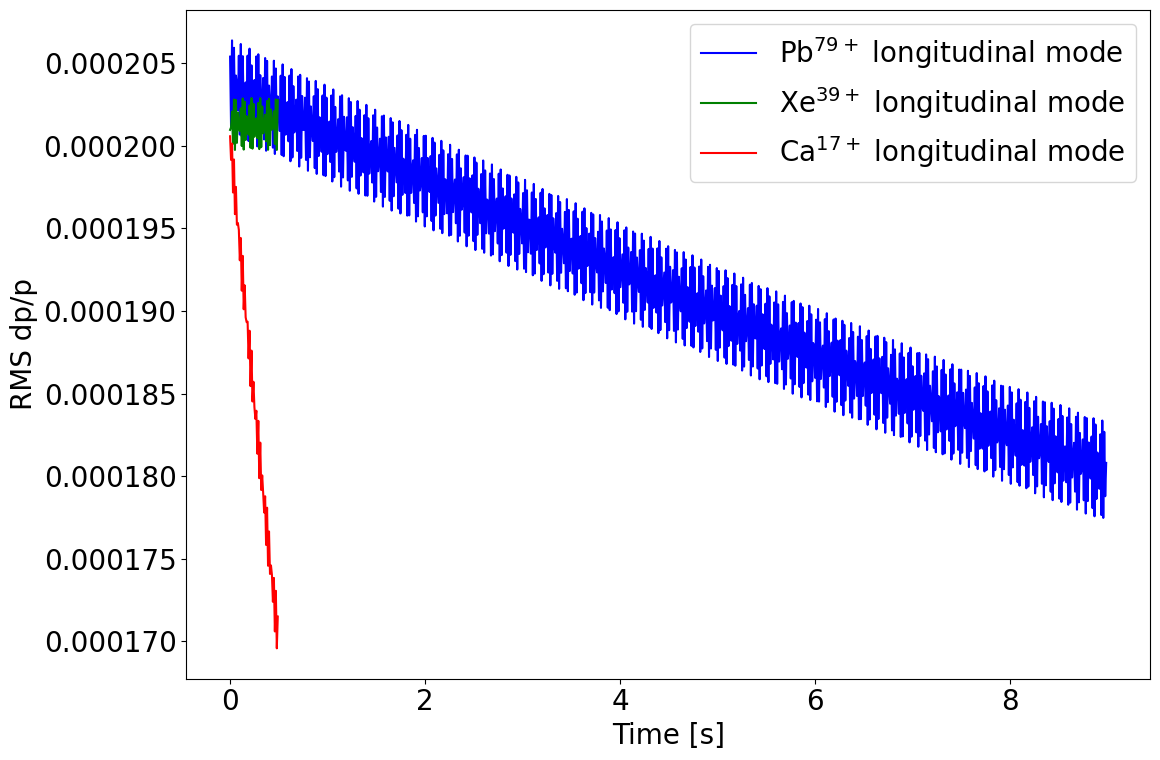

In [3]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

# Define colors to cycle through
colors = ['blue', 'green', 'red']

# for i,ion_loop in enumerate(ions):

#     loaded_data = np.load(f'results/cooling_rates/longitudinal/{ion.name}.npz')

#     delta = loaded_data['delta']
#     zeta = loaded_data['zeta']
#     state = loaded_data['state']
#     x = loaded_data['x'] 
#     time = loaded_data['time']
#     s_per_turn = loaded_data['s_per_turn']
#     px = loaded_data['px']
#     action_x = loaded_data['action_x']
#     action_y = loaded_data['action_y']
#     emittance_x = loaded_data['emittance_x']
#     rms_dp_p = np.std(delta, axis=1)
    
#     # Plot on ax1 and collect handles and labels
#     #plt.plot(time, rms_dp_p, ls='--',label=f'{ion_loop.name} longitudinal mode',color=colors[i])
#     plt.plot(time, np.log(rms_dp_p), label=f'{ion_loop.name}',color=colors[i])



# plt.xlabel(r'Time [s]')
# plt.ylabel(r'RMS dp/p')
# plt.legend()
# plt.tight_layout()
# # plt.savefig('Transverse_laser_cooling_rates.png', dpi=300)
# plt.xlim([0,10])
# plt.show()


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i,ion_loop in enumerate(ions):

    loaded_data = np.load(f'results/cooling_rates/longitudinal/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x']
    time=loaded_data['time']
    s_per_turn=loaded_data['s_per_turn']
    px=loaded_data['px']
    action_x=loaded_data['action_x']
    action_y=loaded_data['action_y']
    emittance_x=loaded_data['emittance_x']

    excited0=state[1,:]==2
    fraction_excitation=sum(excited0)/len(excited0)
    rms_dp_p = np.std(delta, axis=1)
    
    plt.plot(time, (rms_dp_p), label=f'{ion_loop.name} longitudinal mode',color=colors[i])

plt.xlabel(r'Time [s]')
plt.ylabel(r'RMS dp/p')
plt.legend()
plt.tight_layout()
# plt.savefig('Transverse_laser_cooling_rates.png', dpi=300)
plt.show()



/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


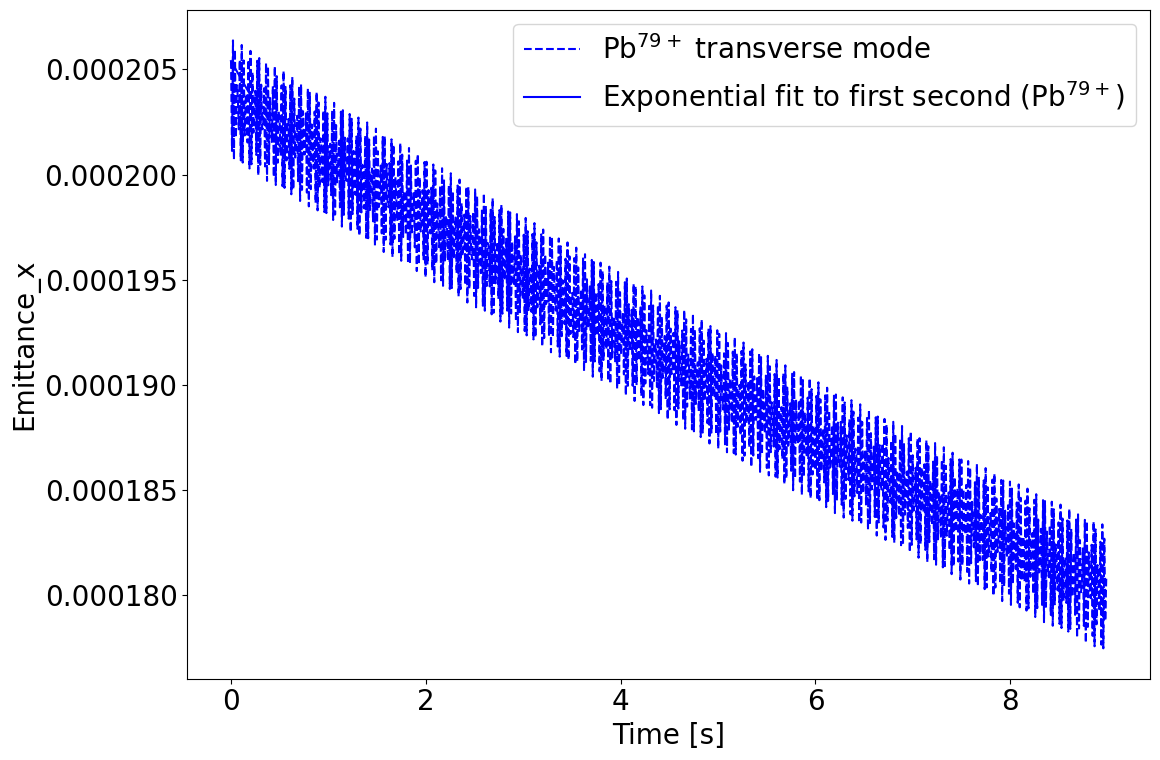

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming you have imported necessary data and defined ions and colors

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

def exponential_func(x, a, b):
    return rms_dp_p[0] * np.exp(-b * x)

for i, ion_loop in enumerate([lead]):

    loaded_data = np.load(f'results/cooling_rates/longitudinal/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x']
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']

    excited0 = state[1, :] == 2
    fraction_excitation = sum(excited0) / len(excited0)
    rms_dp_p = np.std(delta, axis=1)
    

    # Fit exponential to the first second of data
    mask = time <= 0.5
    fit_params, _ = curve_fit(exponential_func, time[mask], rms_dp_p[mask])

    plt.plot(time, rms_dp_p, label=f'{ion_loop.name} transverse mode',ls='--', color=colors[i])
    plt.plot(time[mask], exponential_func(time[mask], *fit_params), color=colors[i],
             label=f'Exponential fit to first second ({ion_loop.name})')

plt.xlabel(r'Time [s]')
plt.ylabel(r'Emittance_x')
plt.legend()
plt.tight_layout()
plt.show()


loop over mask

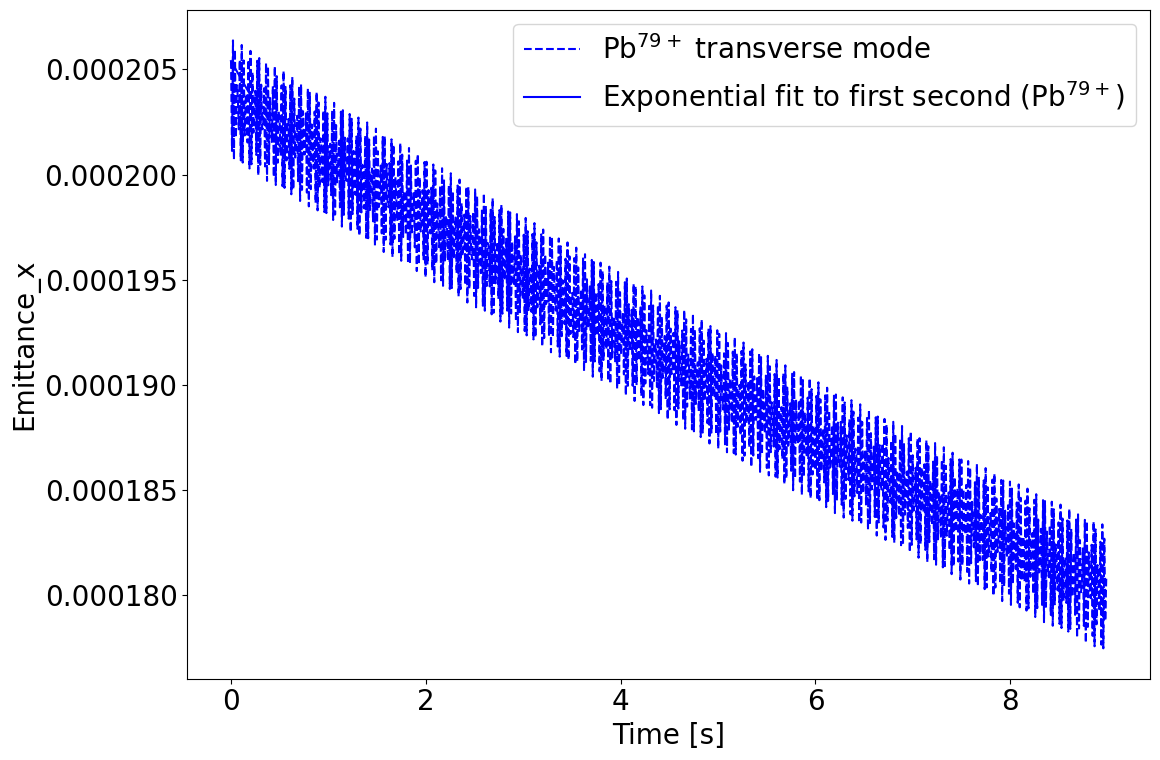

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming you have imported necessary data and defined ions and colors

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

def exponential_func(x, a, b):
    return rms_dp_p[0] * np.exp(-b * x)

for i, ion_loop in enumerate([lead]):

    loaded_data = np.load(f'results/cooling_rates/longitudinal/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x']
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']

    excited0 = state[1, :] == 2
    fraction_excitation = sum(excited0) / len(excited0)
    rms_dp_p = np.std(delta, axis=1)
    

    # Fit exponential to the first second of data
    mask = time <= 0.5
    fit_params, _ = curve_fit(exponential_func, time[mask], rms_dp_p[mask])

    plt.plot(time, rms_dp_p, label=f'{ion_loop.name} transverse mode',ls='--', color=colors[i])
    plt.plot(time[mask], exponential_func(time[mask], *fit_params), color=colors[i],
             label=f'Exponential fit to first second ({ion_loop.name})')

plt.xlabel(r'Time [s]')
plt.ylabel(r'Emittance_x')
plt.legend()
plt.tight_layout()
plt.show()


try with mask

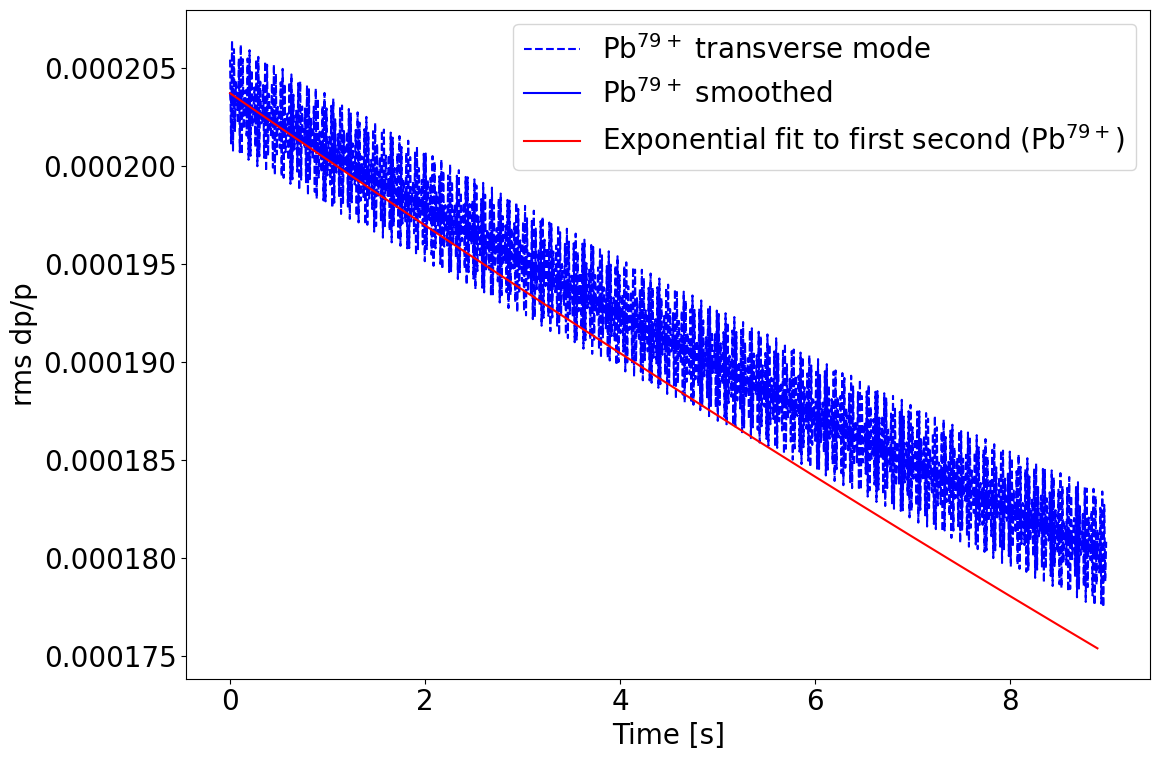

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming you have imported necessary data and defined ions and colors

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

def exponential_func(x, a, b):
    return rms_dp_p_smoothed[0] * np.exp(-b * x)

for i, ion_loop in enumerate([lead]):

    loaded_data = np.load(f'results/cooling_rates/longitudinal/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x']
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']

    excited0 = state[1, :] == 2
    fraction_excitation = sum(excited0) / len(excited0)
    rms_dp_p = np.std(delta, axis=1)

    # Calculate moving average with window size 5
    # Adjust the window size for moving average smoothing
    window_size = 10  # or any other suitable value
    rms_dp_p_smoothed = np.convolve(rms_dp_p, np.ones(window_size)/window_size, mode='valid')


    # Fit exponential to the first second of data
    mask = time[:len(rms_dp_p_smoothed)] <= 0.5
    fit_params, _ = curve_fit(exponential_func, time[:len(rms_dp_p_smoothed)][mask], rms_dp_p_smoothed[mask])

    #fit_params, _ = curve_fit(exponential_func, time[mask], rms_dp_p_smoothed[mask])

    plt.plot(time, rms_dp_p, label=f'{ion_loop.name} transverse mode', ls='--', color=colors[i])
    plt.plot(time[:len(rms_dp_p_smoothed)], rms_dp_p_smoothed, label=f'{ion_loop.name} smoothed', color=colors[i])
    # plt.plot(time[mask], exponential_func(time[mask], *fit_params), color=colors[i],
    #           label=f'Exponential fit to first second ({ion_loop.name})')
    plt.plot(time[:len(rms_dp_p_smoothed)], exponential_func(time[:len(rms_dp_p_smoothed)], *fit_params), color='red',
              label=f'Exponential fit to first second ({ion_loop.name})')
 
plt.xlabel(r'Time [s]')
plt.ylabel(r'rms dp/p')
plt.legend()
plt.tight_layout()
plt.show()


try running average

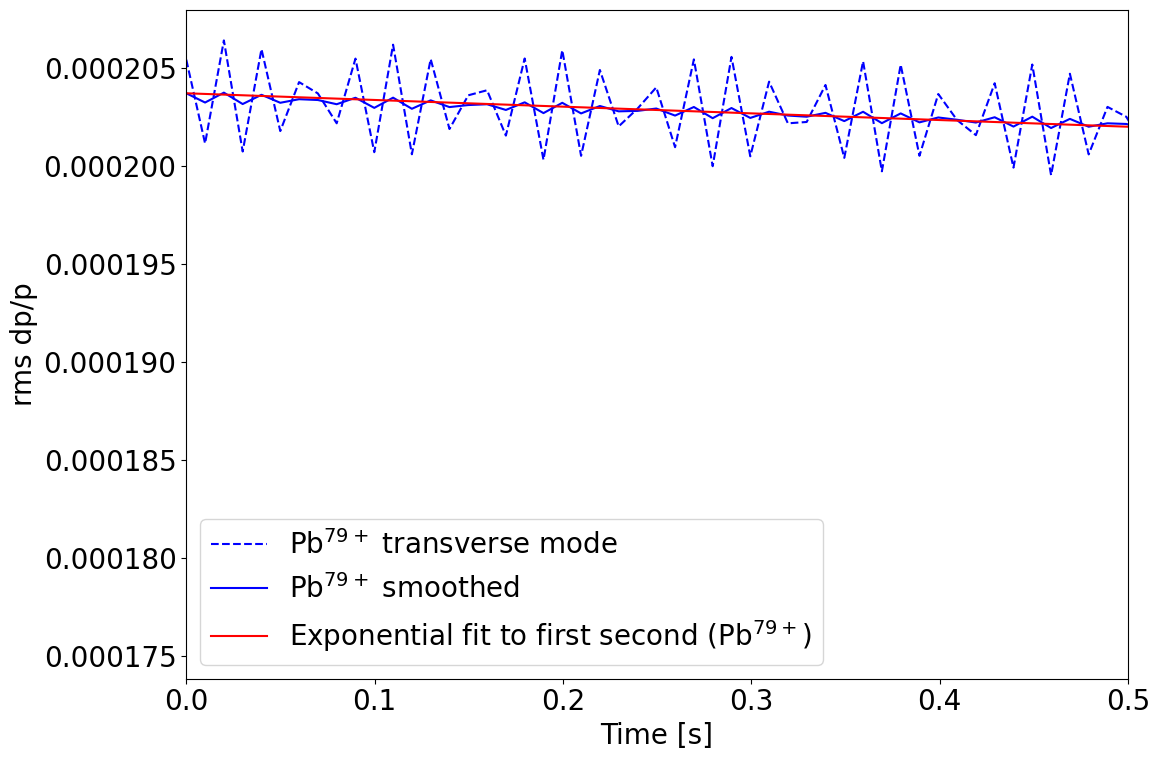

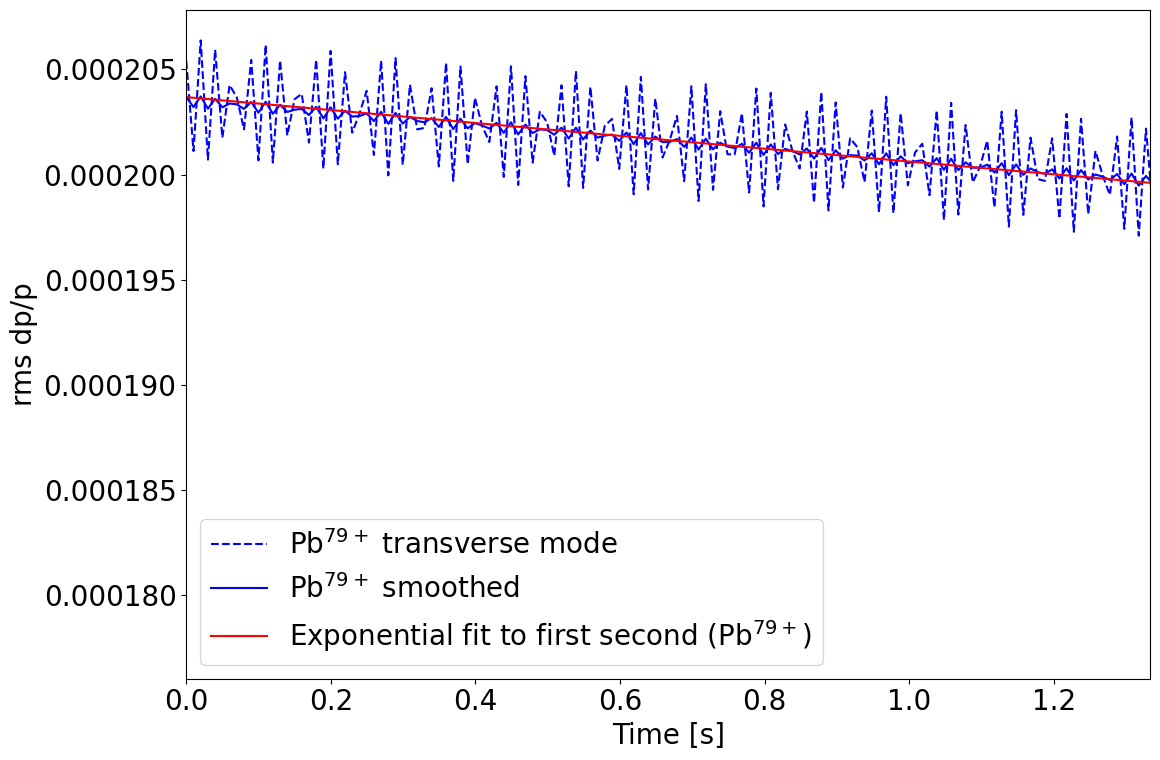

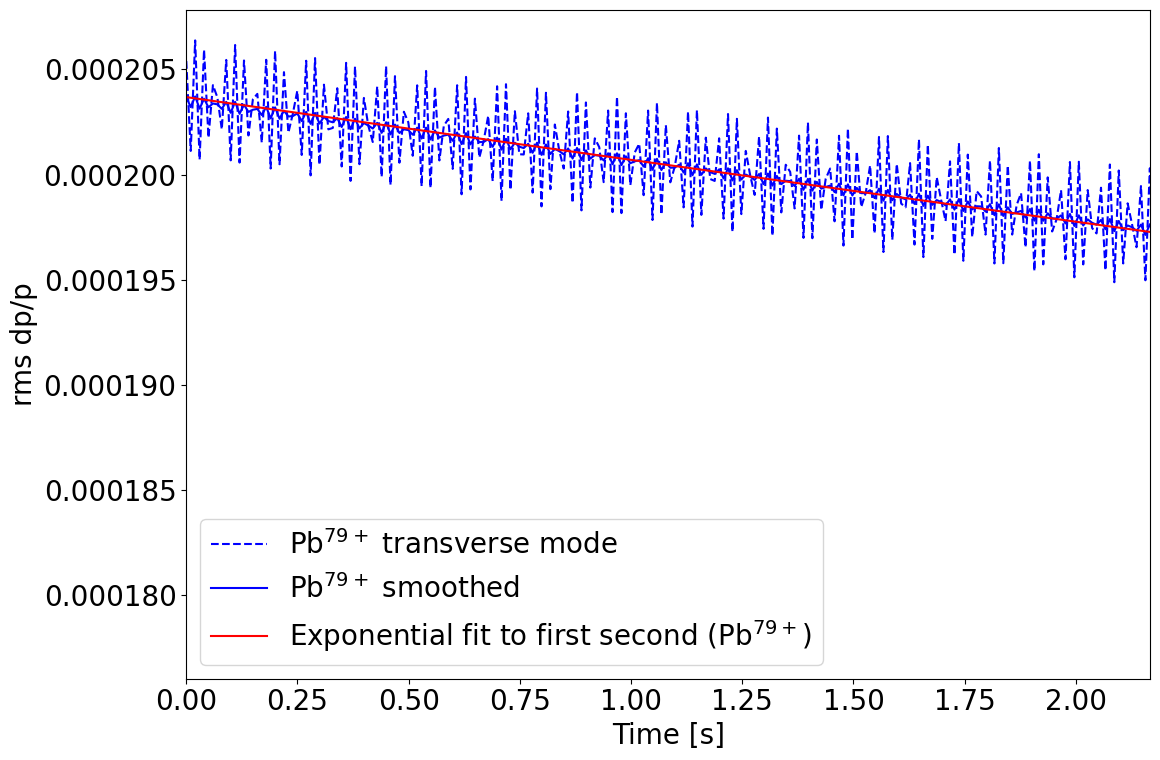

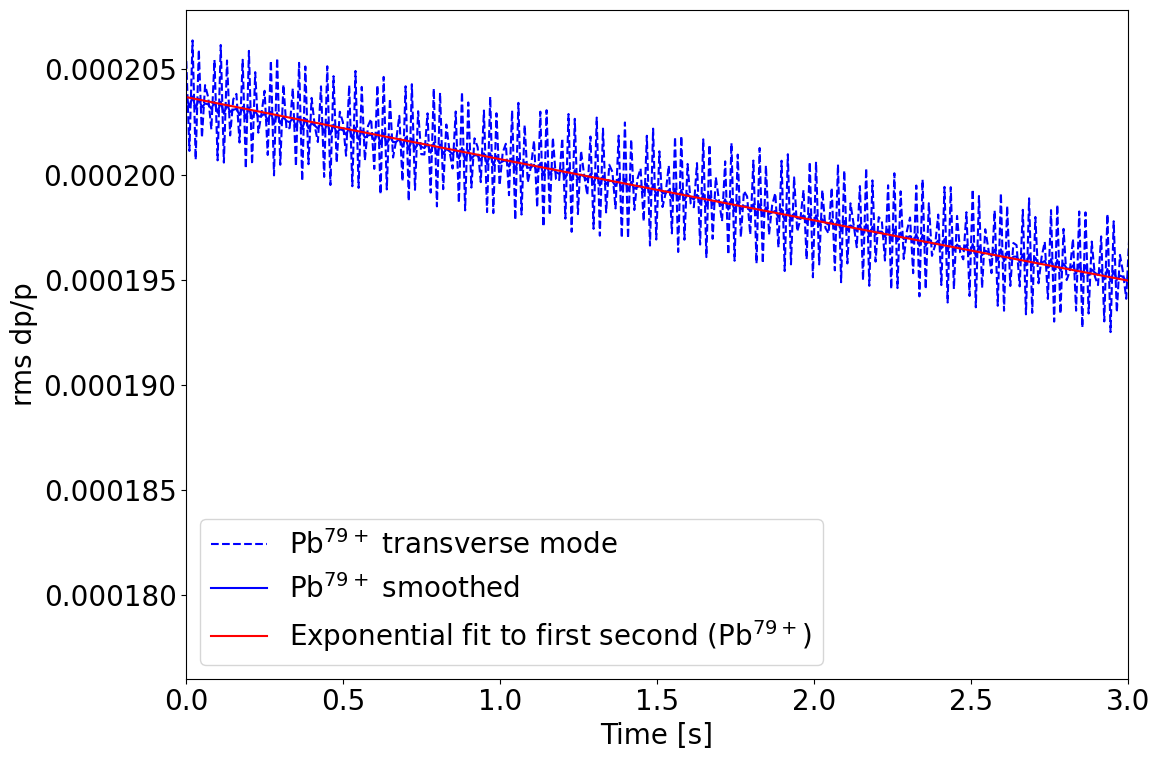

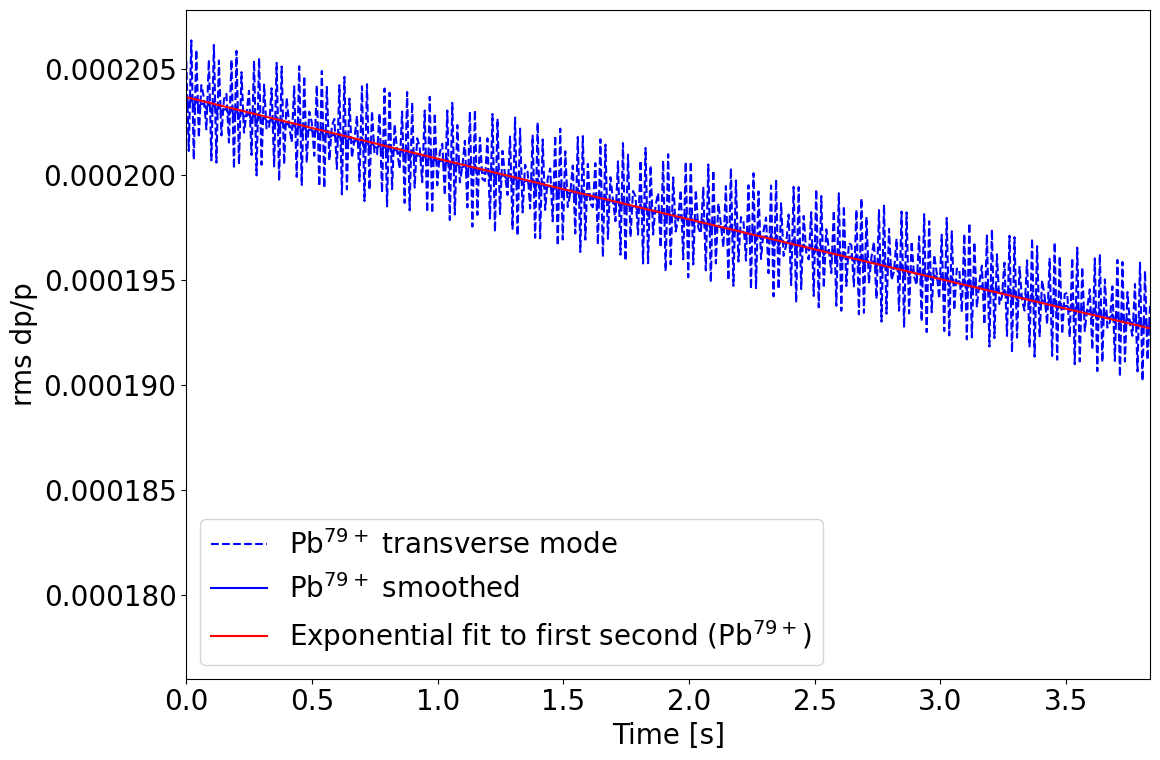

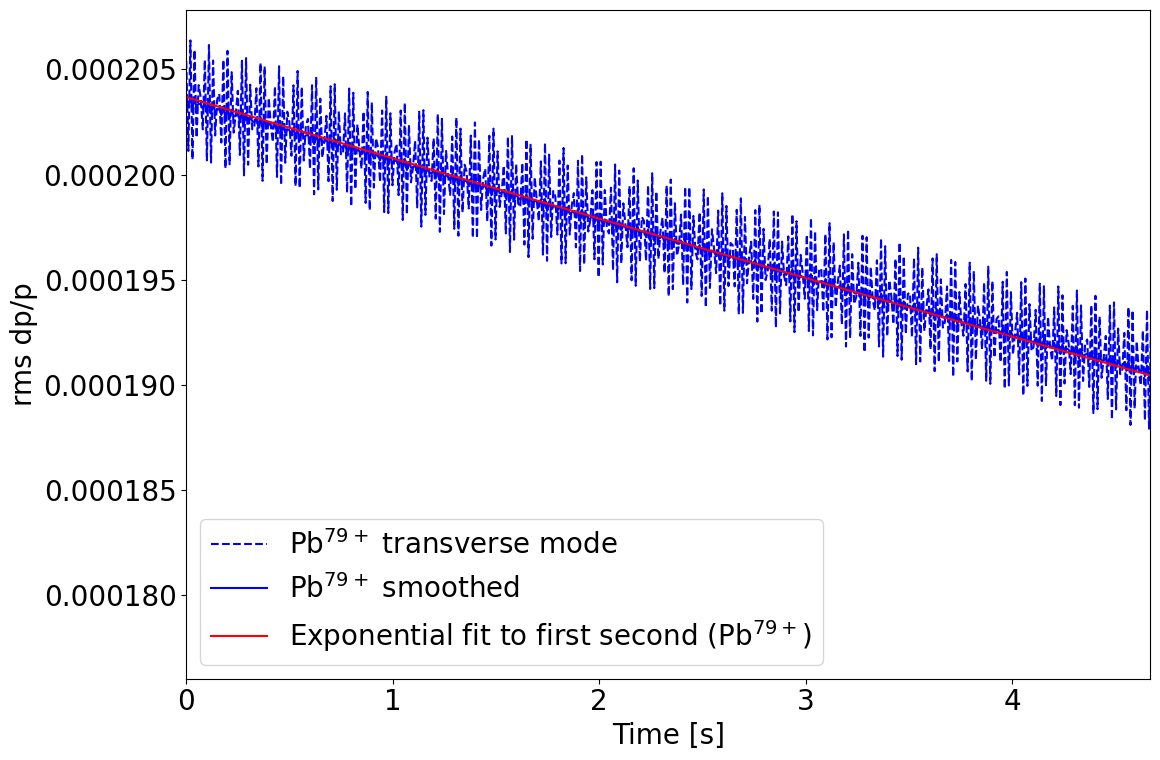

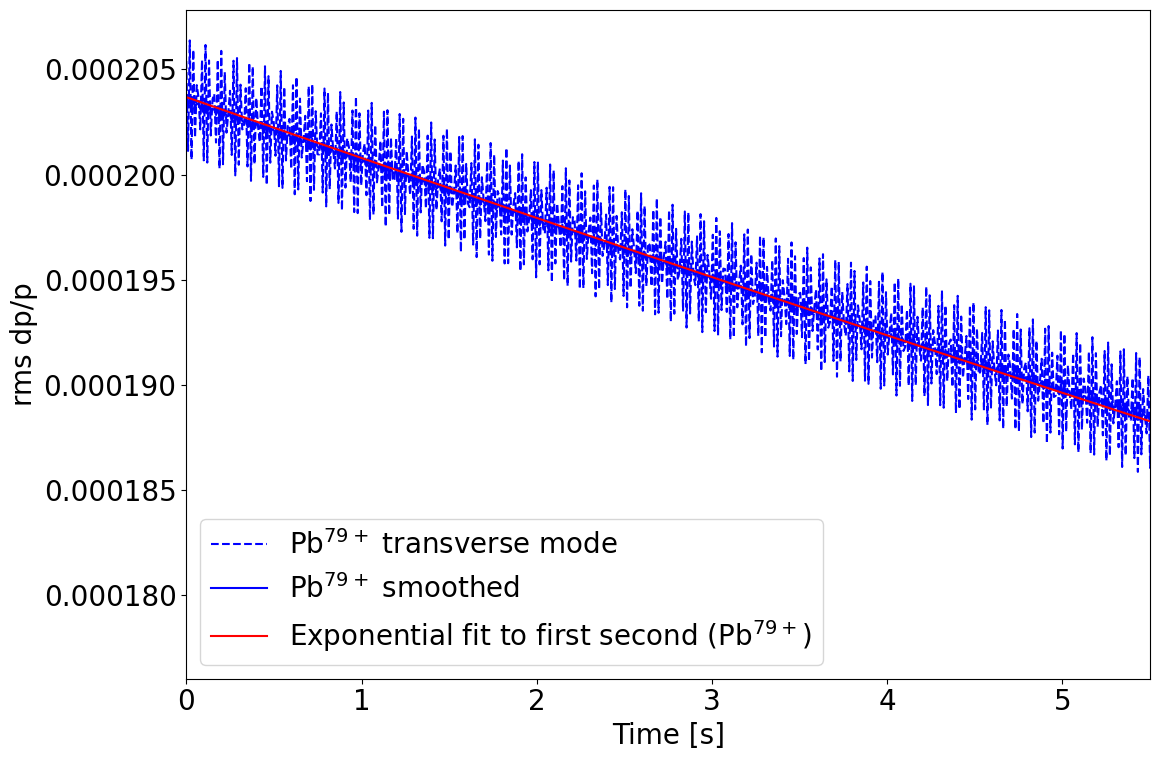

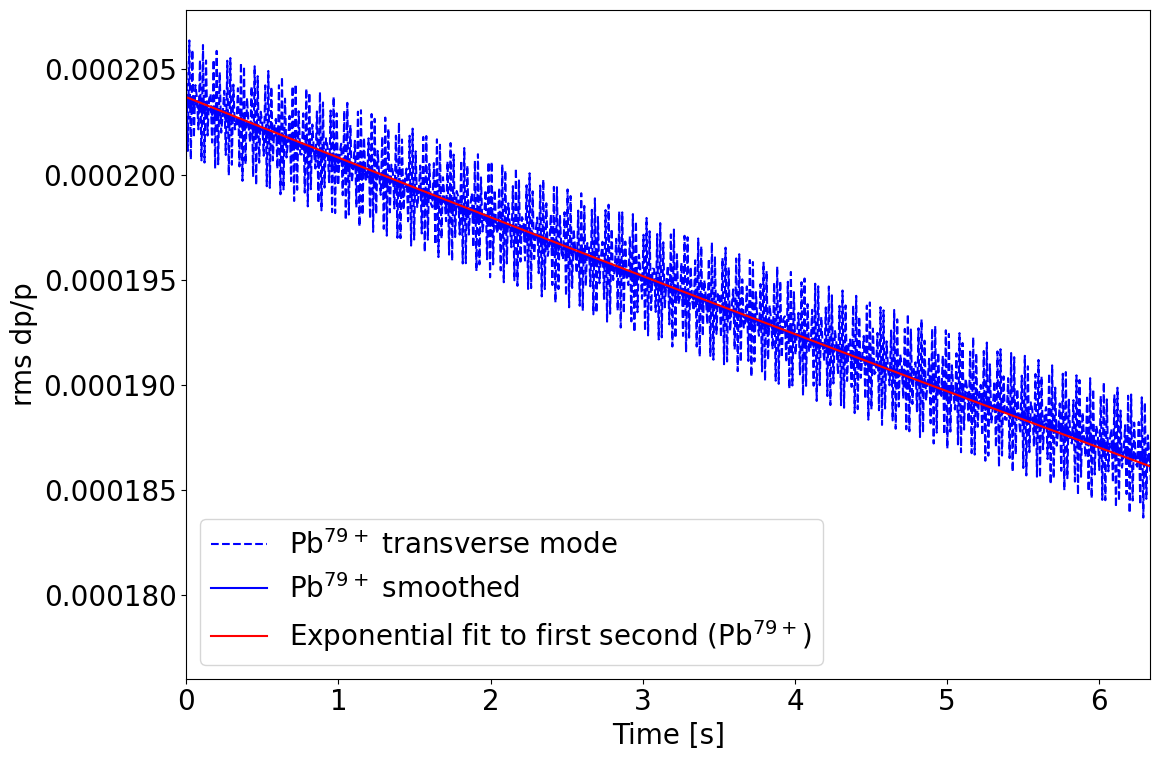

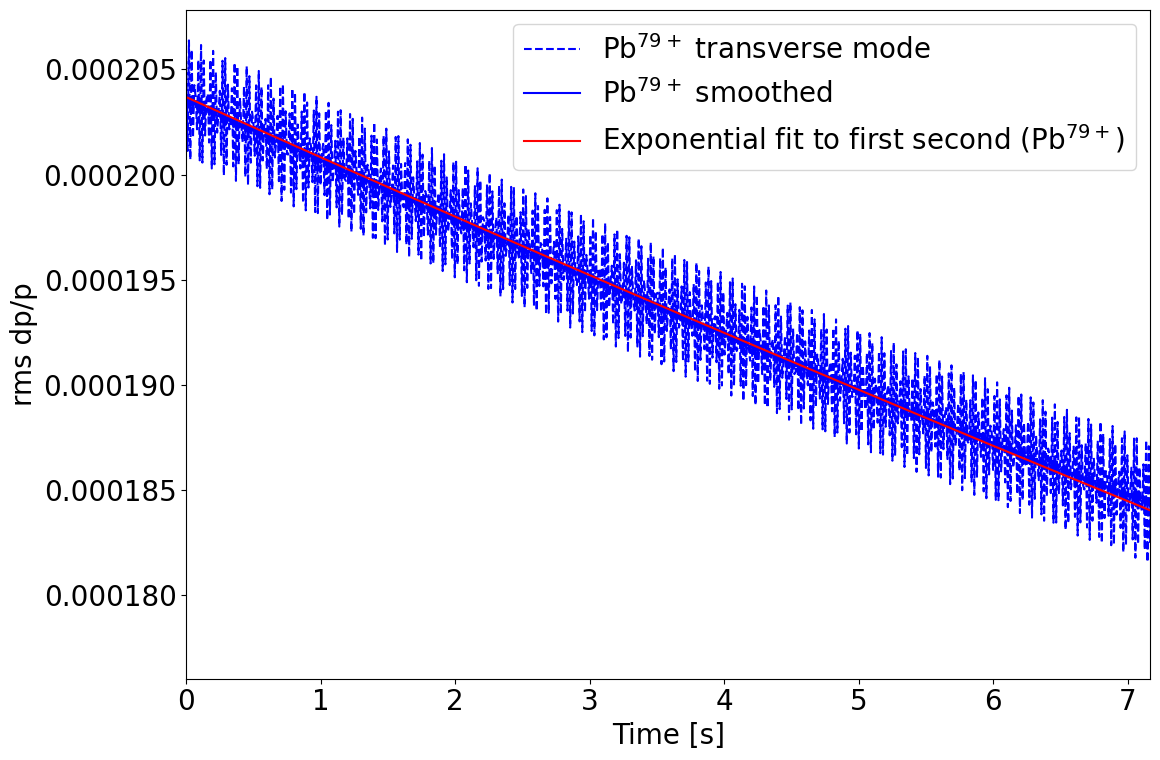

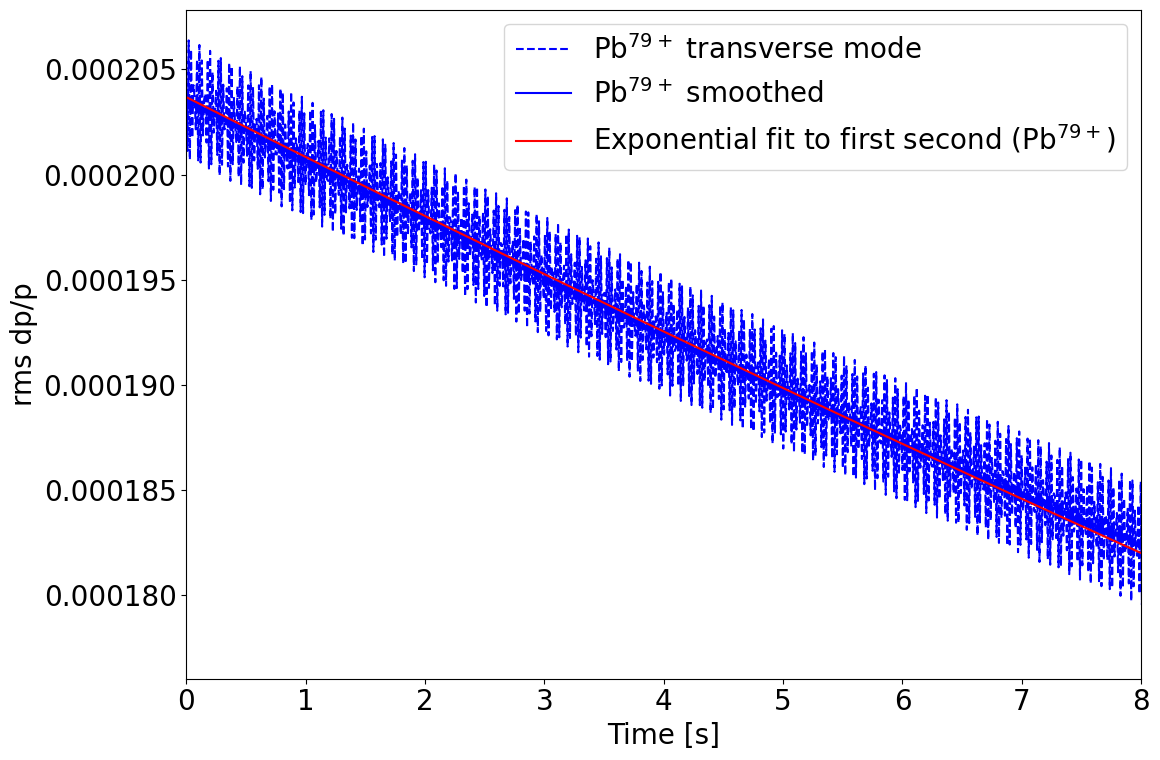

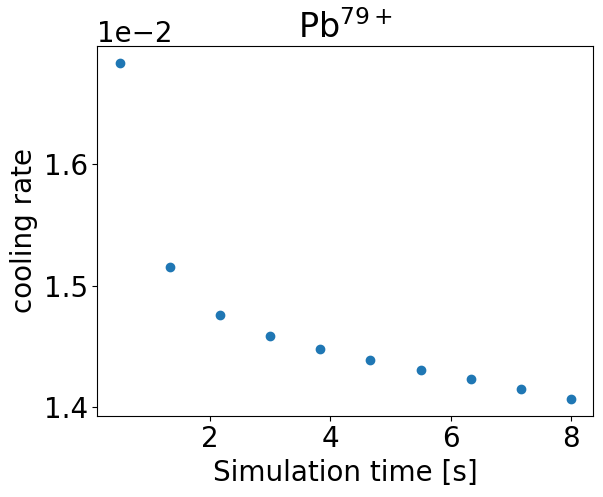

10


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming you have imported necessary data and defined ions and colors



def exponential_func(x, a, b):
    return rms_dp_p_smoothed[0] * np.exp(-b * x)

mask_range = np.linspace(0.5, 8, num=10)  # Adjust the number of masks as needed

for i, ion_loop in enumerate([lead]):

    cooler_rate=[]

    loaded_data = np.load(f'results/cooling_rates/longitudinal/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x']
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']

    excited0 = state[1, :] == 2
    fraction_excitation = sum(excited0) / len(excited0)
    rms_dp_p = np.std(delta, axis=1)

    # Calculate moving average with window size 5
    # Adjust the window size for moving average smoothing
    window_size = 10  # or any other suitable value
    rms_dp_p_smoothed = np.convolve(rms_dp_p, np.ones(window_size)/window_size, mode='valid')

    for mask_value in mask_range:

        window_size = 10  # or any other suitable value
        rms_dp_p_smoothed = np.convolve(rms_dp_p, np.ones(window_size)/window_size, mode='valid')


        # Fit exponential to the first second of data
        mask = time[:len(rms_dp_p_smoothed)] <= mask_value
        fit_params, _ = curve_fit(exponential_func, time[:len(rms_dp_p_smoothed)][mask], rms_dp_p_smoothed[mask])
        cooler_rate.append(fit_params[1])
        #fit_params, _ = curve_fit(exponential_func, time[mask], rms_dp_p_smoothed[mask])

        plt.figure(figsize=(12, 8))
        plt.rcParams.update({'font.size': 20})
        plt.plot(time, rms_dp_p, label=f'{ion_loop.name} transverse mode', ls='--', color=colors[i])
        plt.plot(time[:len(rms_dp_p_smoothed)], rms_dp_p_smoothed, label=f'{ion_loop.name} smoothed', color=colors[i])
        # plt.plot(time[mask], exponential_func(time[mask], *fit_params), color=colors[i],
        #           label=f'Exponential fit to first second ({ion_loop.name})')
        plt.plot(time[:len(rms_dp_p_smoothed)], exponential_func(time[:len(rms_dp_p_smoothed)], *fit_params), color='red',
                label=f'Exponential fit to first second ({ion_loop.name})')
    

        plt.xlabel(r'Time [s]')
        plt.ylabel(r'rms dp/p')
        plt.xlim([0,mask_value])
        plt.legend()
        plt.tight_layout()
        plt.show()



    plt.figure()
    plt.title(f'{ion_loop.name}')
    plt.scatter(mask_range,cooler_rate)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xlabel('Simulation time [s]')
    plt.ylabel('cooling rate')
    plt.show()
    print(len(cooler_rate))

In [8]:
236/0.938

251.5991471215352

loop over a range of mask times

<Figure size 1200x800 with 0 Axes>

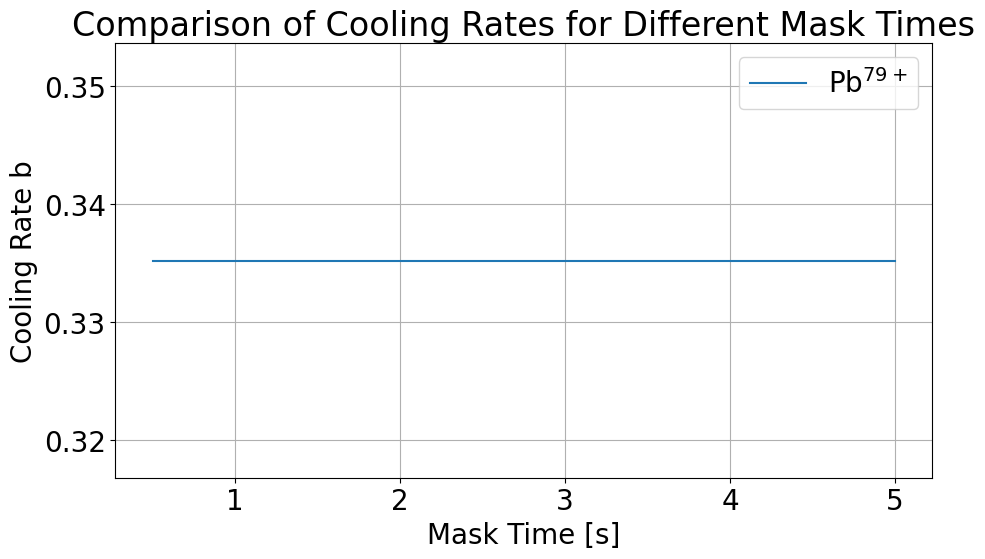

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming you have imported necessary data and defined ions and colors

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

def exponential_func(x, a, b):
    return rms_dp_p[0] * np.exp(-b * x)

# Define a range of mask times
mask_times = np.linspace(0.5,5,10)

# Initialize arrays to store fitting parameters
fit_params_array = np.zeros((len(mask_times), len(ions), 2))  # (num_mask_times, num_ions, num_fit_params)

for j, mask_time in enumerate(mask_times):
    for i, ion_loop in enumerate([calcium]):

        loaded_data = np.load(f'results/cooling_rates/longitudinal/{ion_loop.name}.npz')

        delta = loaded_data['delta']
        zeta = loaded_data['zeta']
        state = loaded_data['state']
        x = loaded_data['x']
        time = loaded_data['time']
        s_per_turn = loaded_data['s_per_turn']
        px = loaded_data['px']
        action_x = loaded_data['action_x']
        action_y = loaded_data['action_y']
        emittance_x = loaded_data['emittance_x']

        excited0 = state[1, :] == 2
        fraction_excitation = sum(excited0) / len(excited0)
        rms_dp_p = np.std(delta, axis=1)

        # Fit exponential to the current mask time
        mask = time <= mask_time
        fit_params, _ = curve_fit(exponential_func, time[mask], rms_dp_p[mask])

        fit_params_array[j, i] = fit_params

# Plot cooling rate b for each mask time
plt.figure(figsize=(10, 6))
for i, ion_loop in enumerate([lead]):
    plt.plot(mask_times, fit_params_array[:, i, 1], label=f'{ion_loop.name}')

plt.xlabel('Mask Time [s]')
plt.ylabel('Cooling Rate b')
plt.title('Comparison of Cooling Rates for Different Mask Times')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plot derivative

In [10]:
# # Calculate the derivative
# derivative = (np.log(emittance_x), time)

# plt.plot(time, derivative, label=f'{ion_loop.name} longitudinal mode', color=colors[i])


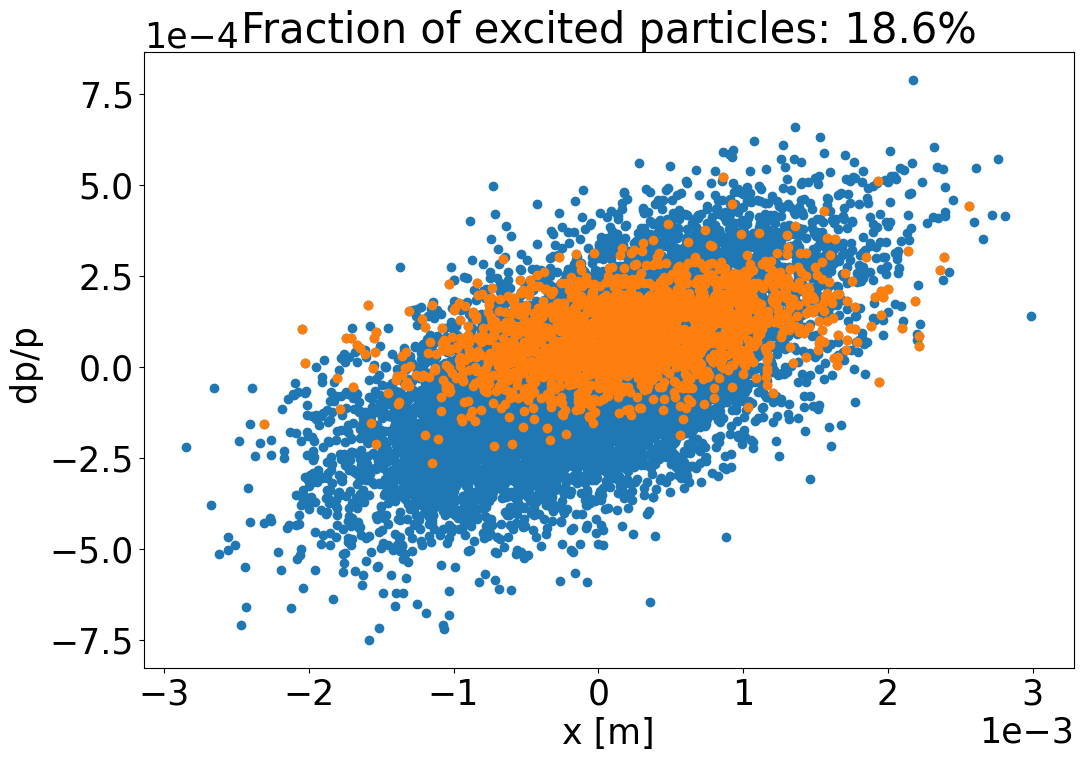

In [11]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction of excited particles: {fraction_excitation*100:.3}%')
plt.scatter(x[1,:],delta[1,:])
plt.scatter(x[1,:][excited0],delta[1,:][excited0])
plt.xlabel('x [m]')
plt.ylabel('dp/p ')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

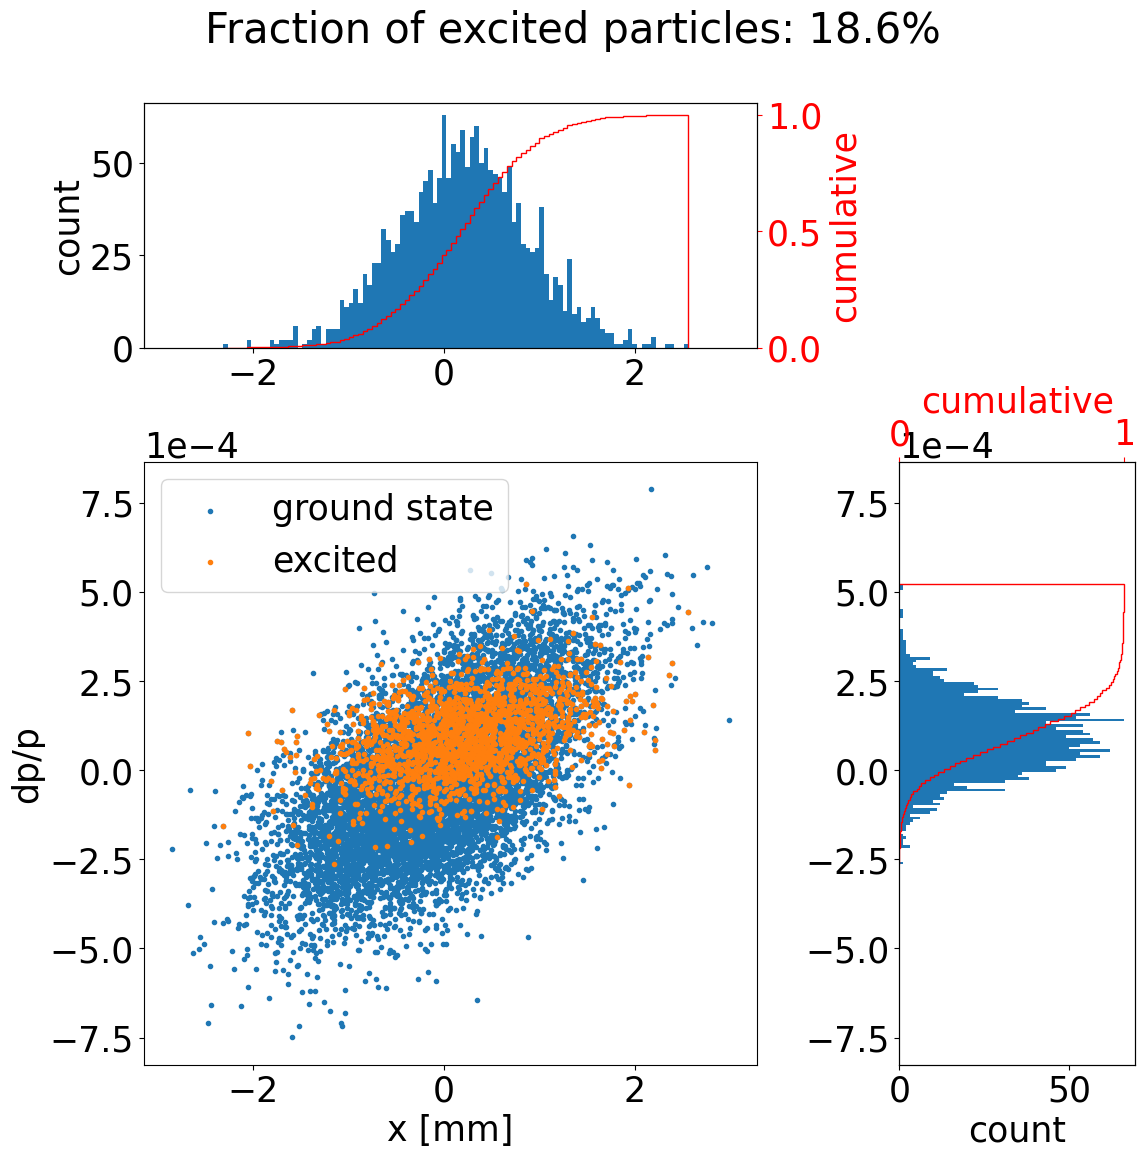

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

ax_main.scatter(x[1,:]*1e3, delta[1,:], marker='.',label='ground state')
ax_main.scatter(x[1,:][excited0]*1e3, delta[1,:][excited0], marker='.',label='excited')
ax_main.set(xlabel="x [mm]", ylabel="dp/p")

ax_main.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

ax_xDist.hist(x[1,:][excited0]*1e3, bins=100, align='mid')
ax_xDist.set(ylabel='count')
ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.hist(x[1,:][excited0]*1e3, bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid')
ax_xCumDist.tick_params('y', colors='r')
ax_xCumDist.set_ylabel('cumulative', color='r')


ax_yDist.hist(delta[1,:][excited0], bins=100, orientation='horizontal', align='mid')
ax_yDist.set(xlabel='count')
ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.hist(delta[1,:][excited0], bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid', orientation='horizontal')
ax_yCumDist.tick_params('x', colors='r')
ax_yCumDist.set_xlabel('cumulative', color='r')

# Setting tick label format for y-axis
ax_xDist.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax_xCumDist.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax_main.legend()

plt.suptitle(f'Fraction of excited particles: {fraction_excitation*100:.3}%')

plt.tight_layout()
plt.show()


longitudinal

In [13]:
ion=xenon

loaded_data = np.load(f'results/cooling_rates/longitudinal/{ion.name}.npz')

delta = loaded_data['delta']
zeta = loaded_data['zeta']
state = loaded_data['state']
x = loaded_data['x'] 
time = loaded_data['time']
s_per_turn = loaded_data['s_per_turn']
px = loaded_data['px']
action_x = loaded_data['action_x']
action_y = loaded_data['action_y']
emittance_x = loaded_data['emittance_x']
rms_dp_p = np.std(delta, axis=1)

excited0=state[1,:]==2
fraction_excitation=sum(excited0)/len(excited0)
excited0

array([False, False, False, ..., False, False, False])

/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


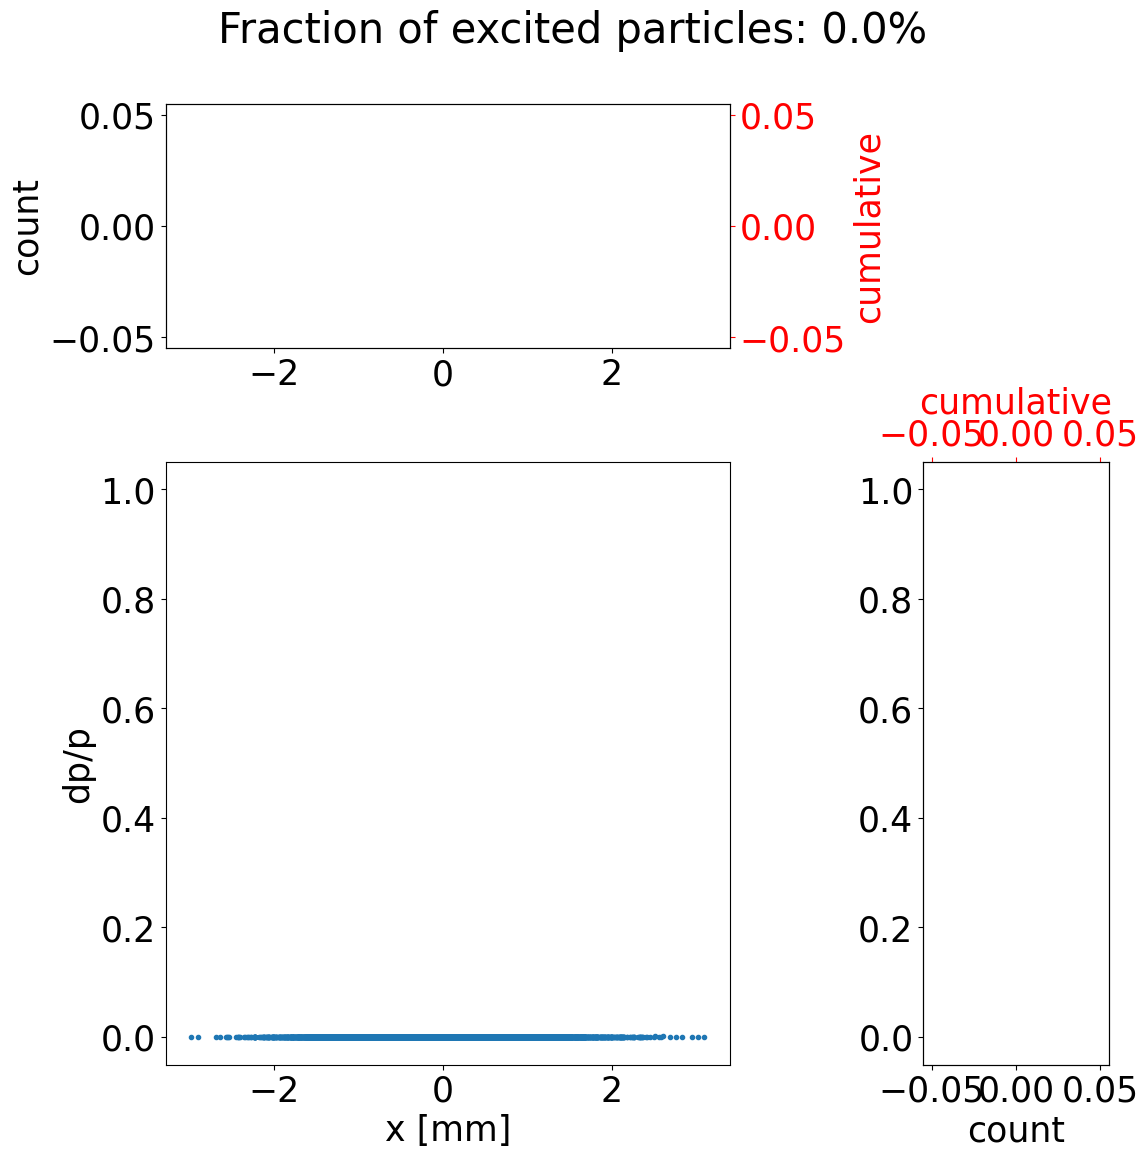

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

ax_main.scatter(x[1,:]*1e3, delta[1,:], marker='.')
ax_main.scatter(x[1,:][excited0]*1e3, delta[1,:][excited0], marker='.')
ax_main.set(xlabel="x [mm]", ylabel="dp/p")

ax_main.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

ax_xDist.hist(x[1,:][excited0]*1e3, bins=100, align='mid')
ax_xDist.set(ylabel='count')
ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.hist(x[1,:][excited0]*1e3, bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid')
ax_xCumDist.tick_params('y', colors='r')
ax_xCumDist.set_ylabel('cumulative', color='r')


ax_yDist.hist(delta[1,:][excited0], bins=100, orientation='horizontal', align='mid')
ax_yDist.set(xlabel='count')
ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.hist(delta[1,:][excited0], bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid', orientation='horizontal')
ax_yCumDist.tick_params('x', colors='r')
ax_yCumDist.set_xlabel('cumulative', color='r')

# Setting tick label format for y-axis
ax_xDist.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax_xCumDist.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

plt.suptitle(f'Fraction of excited particles: {fraction_excitation*100:.3}%')

plt.tight_layout()
plt.show()

xenon 2nd

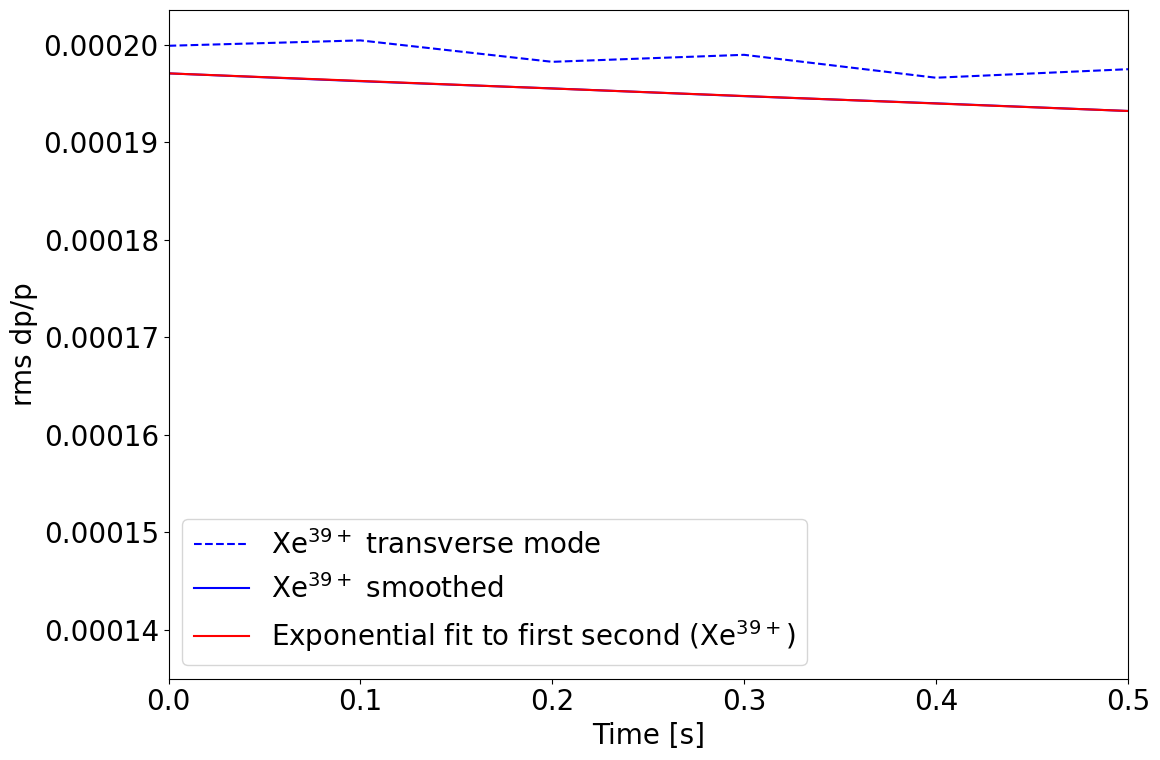

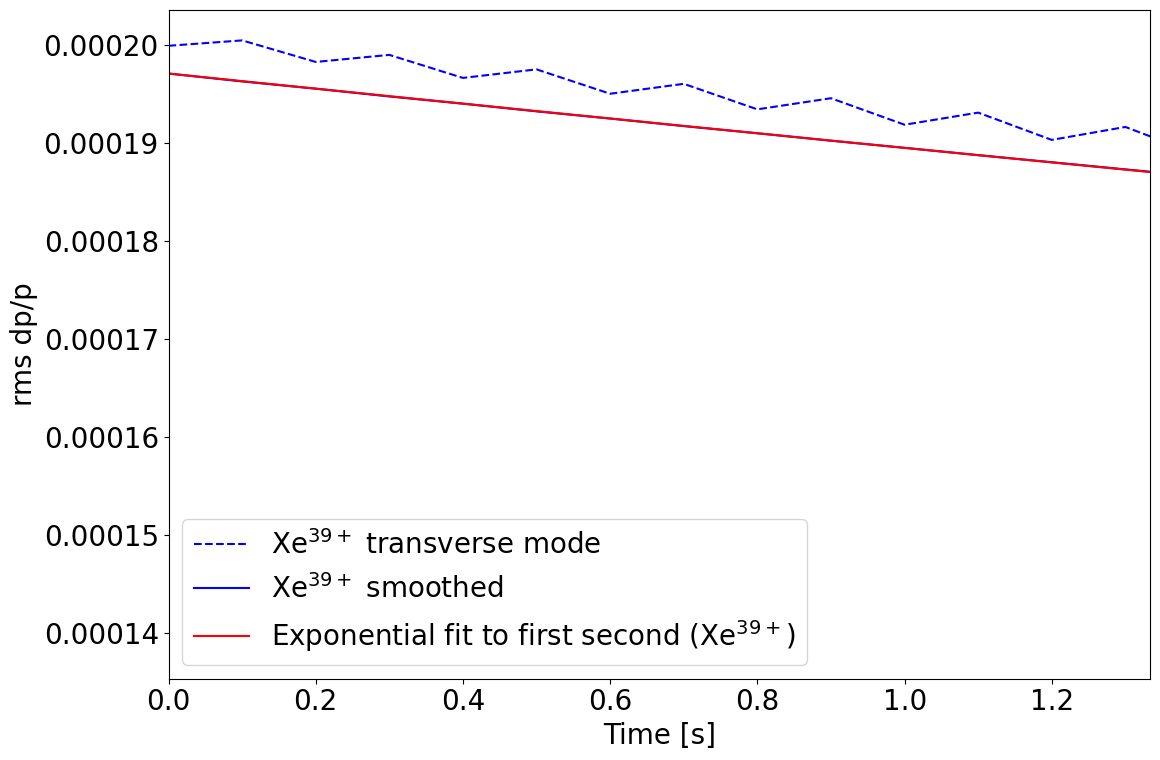

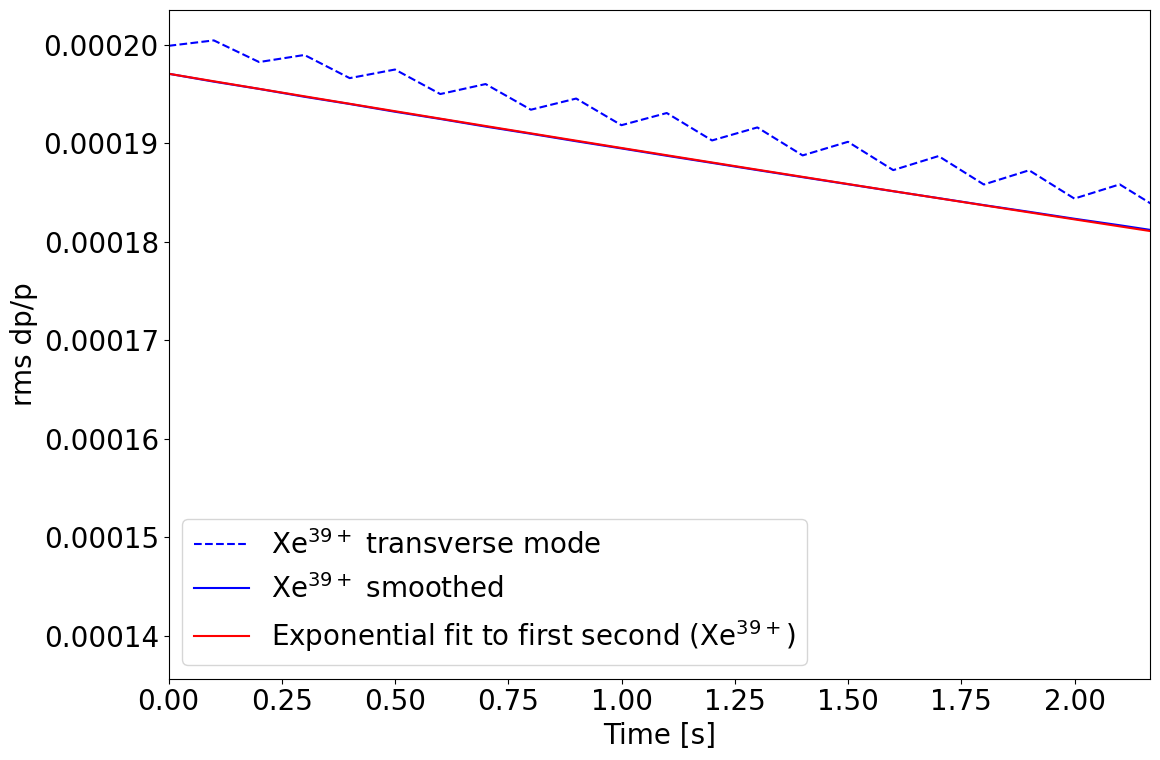

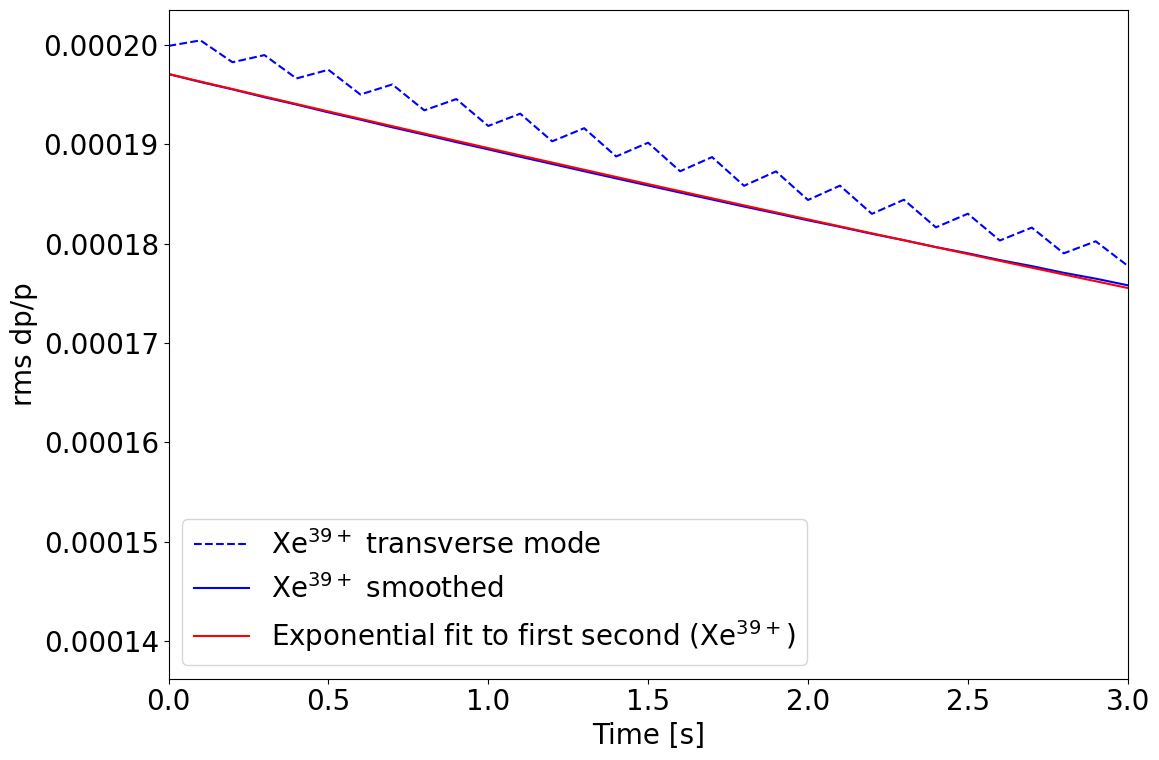

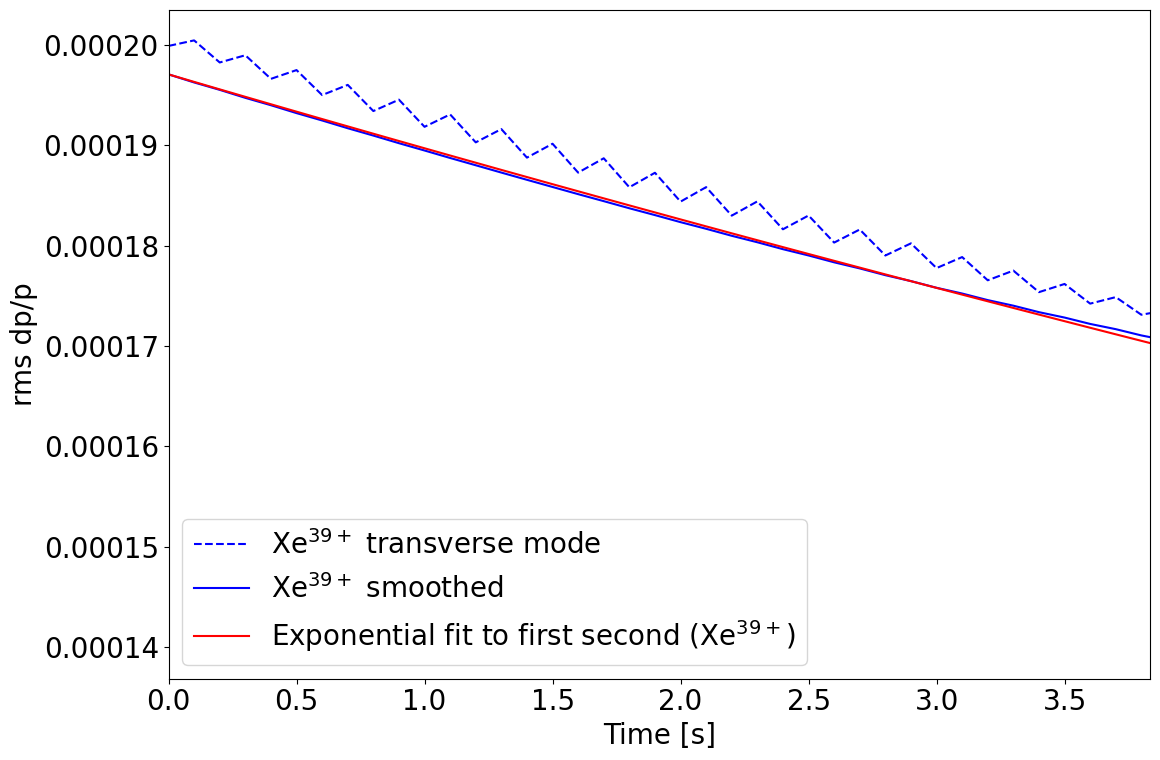

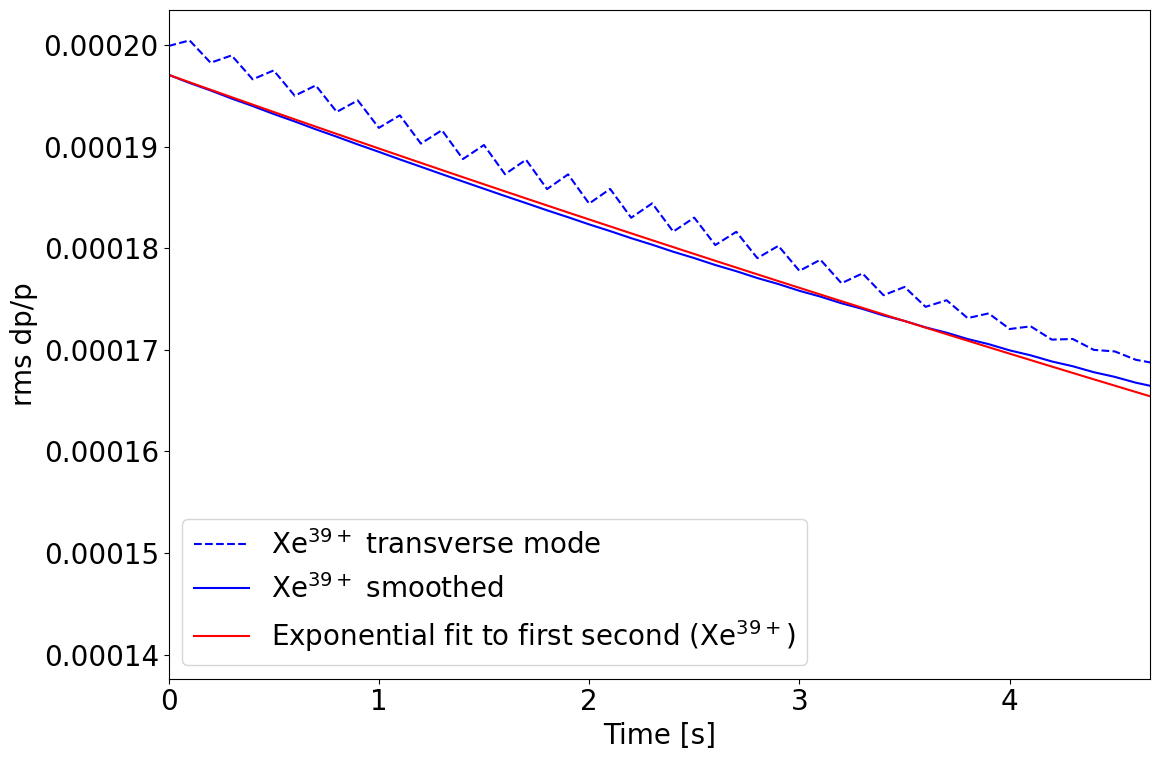

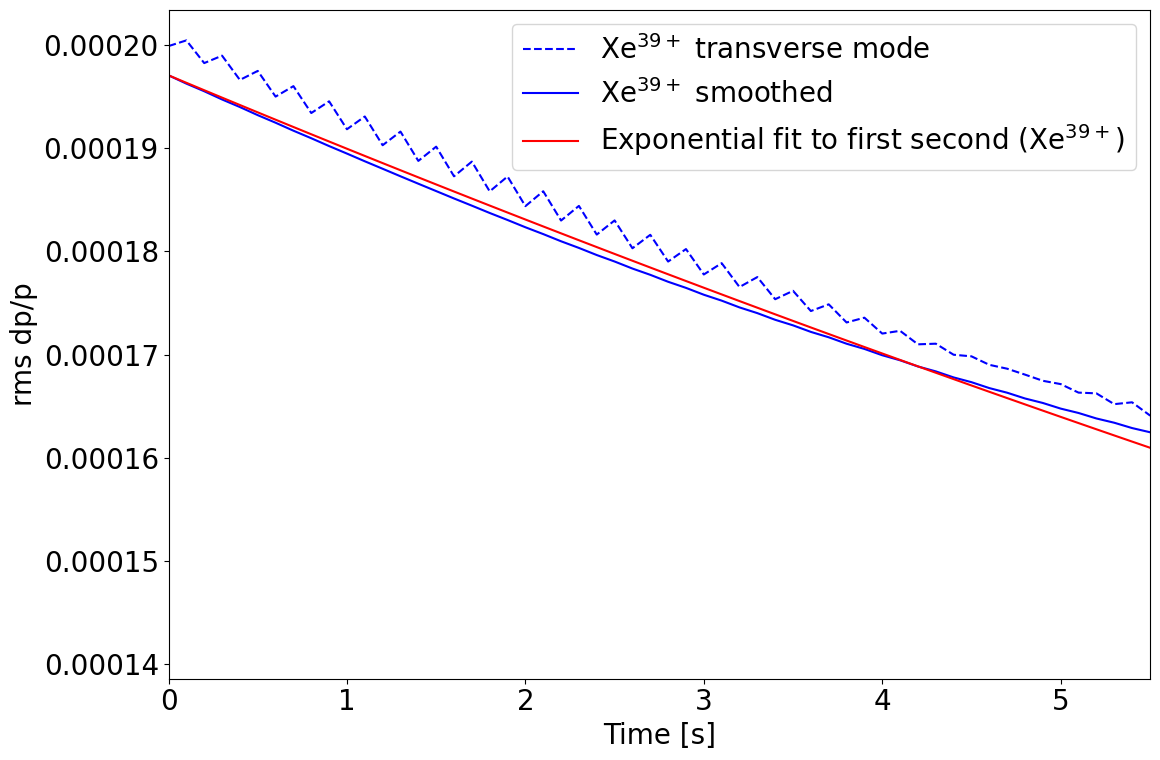

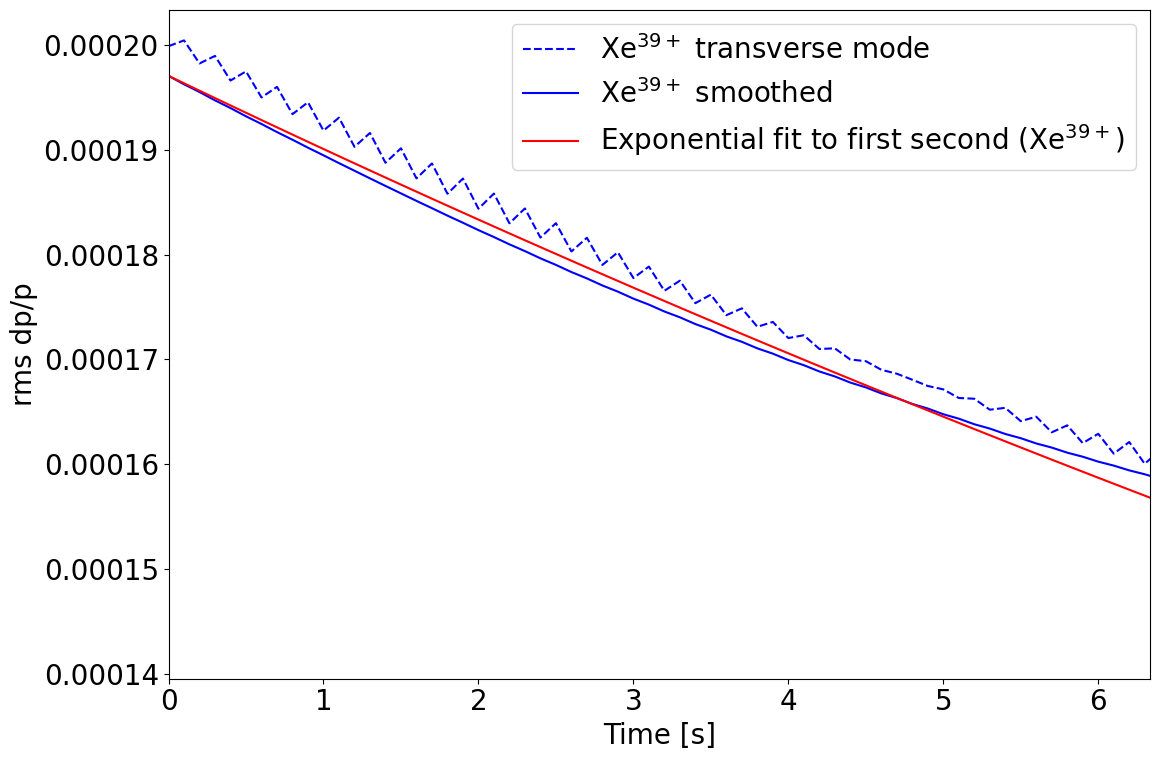

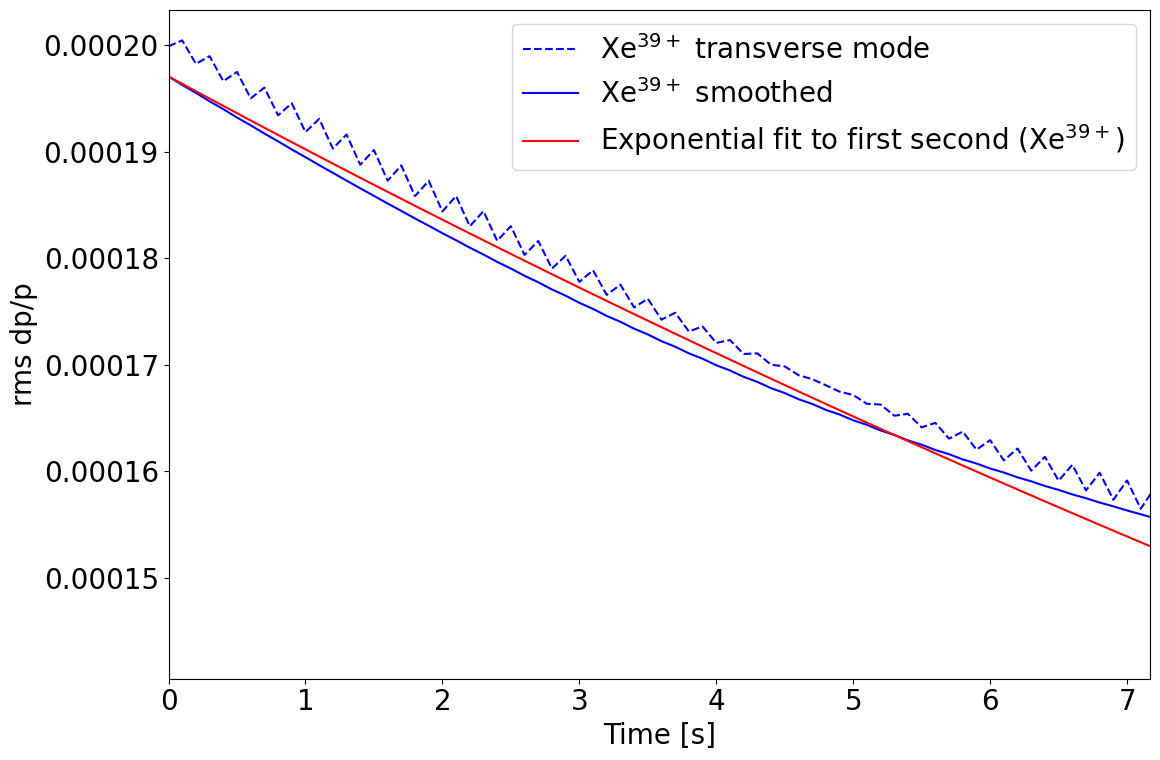

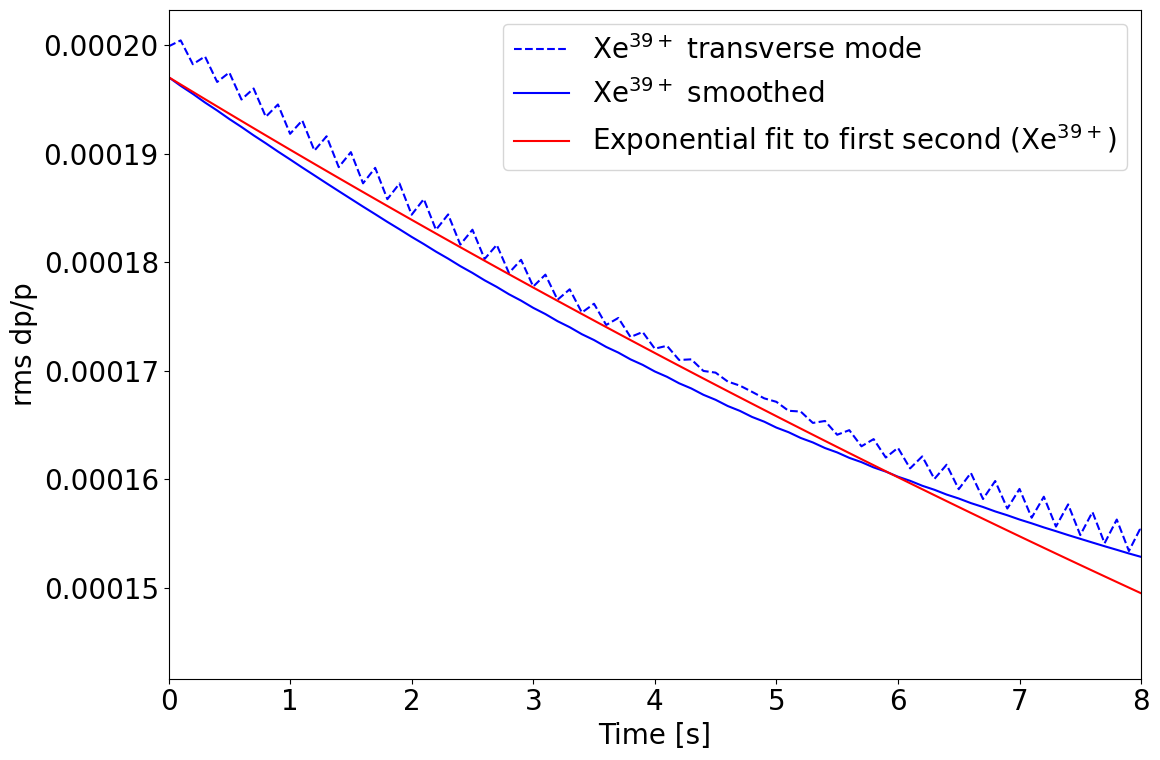

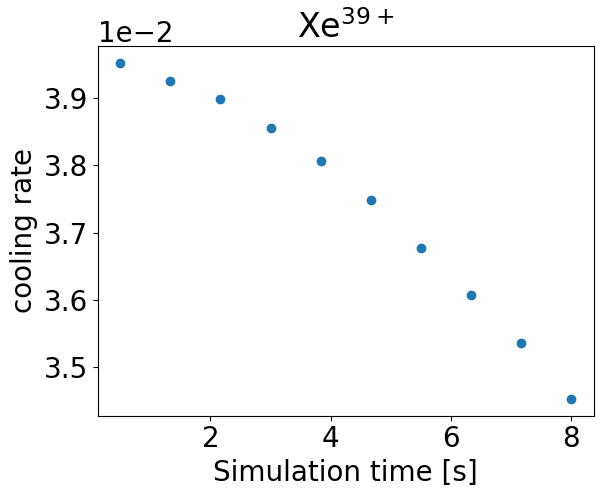

10


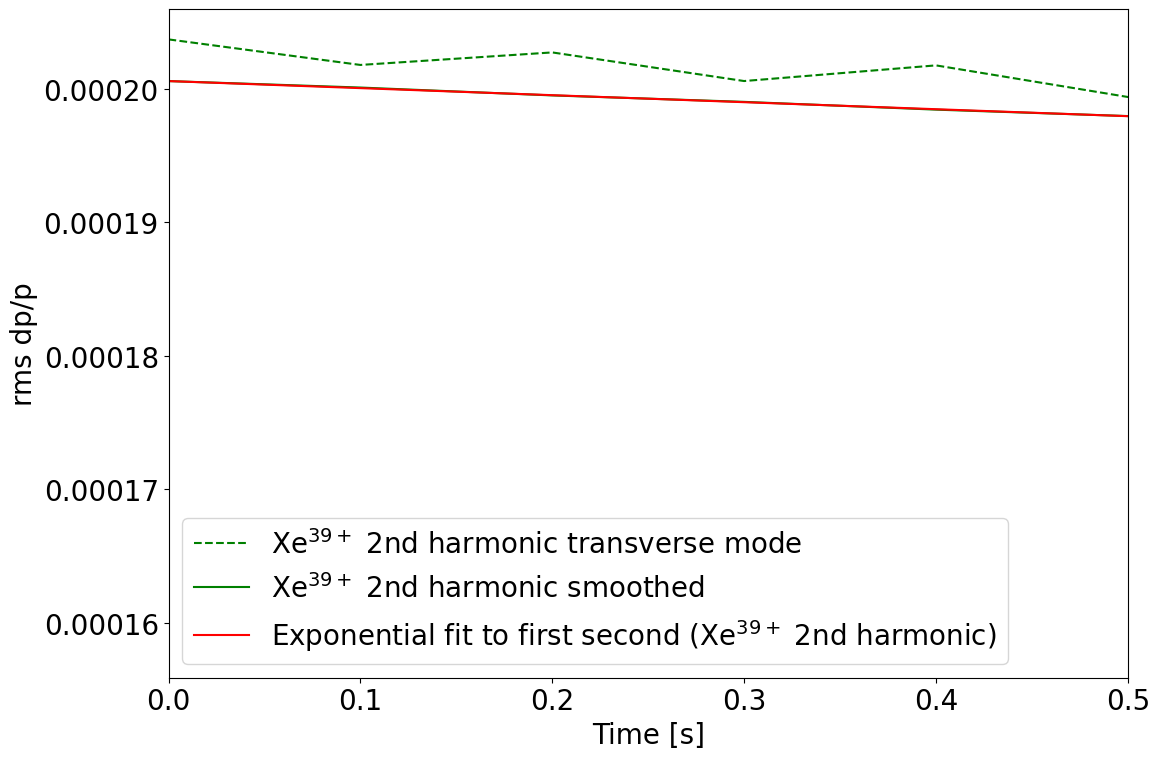

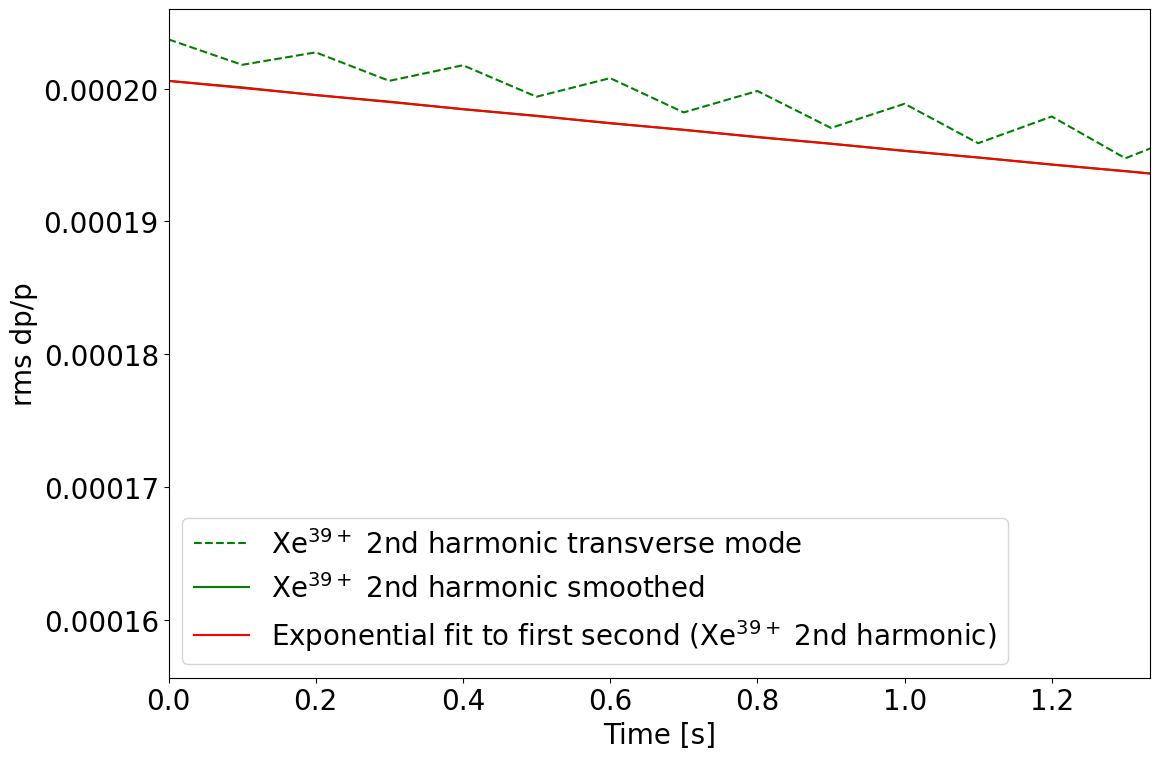

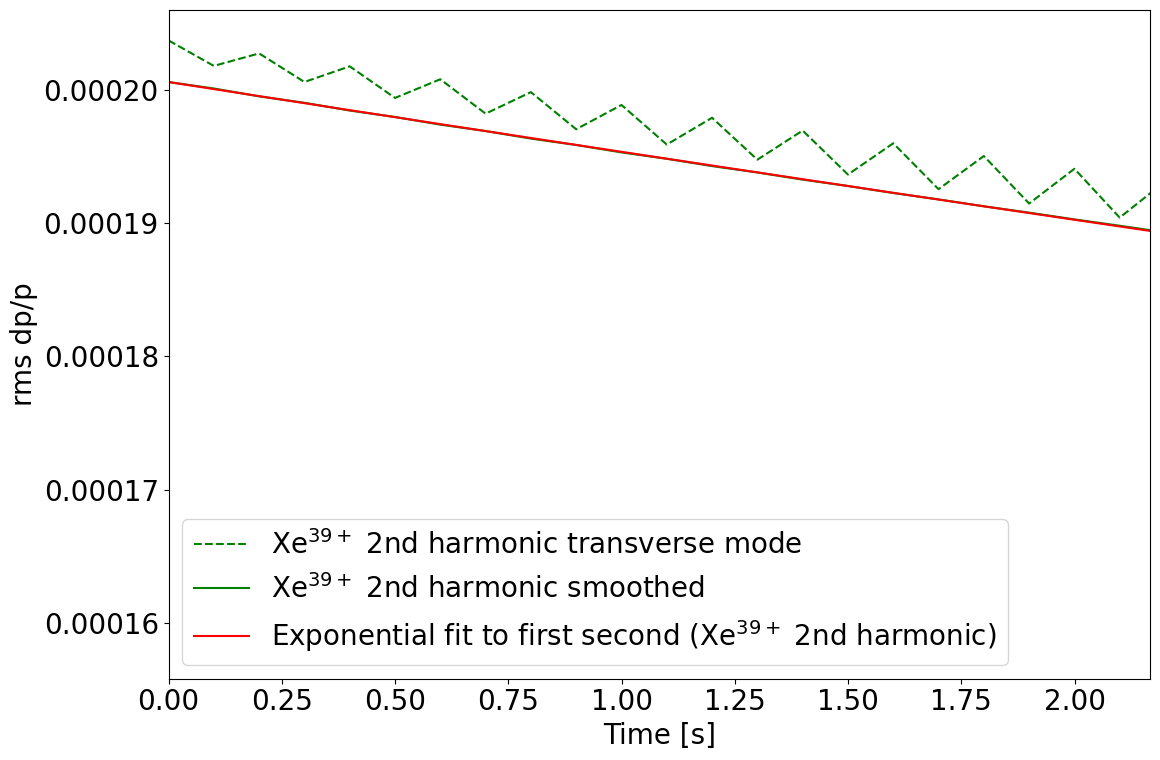

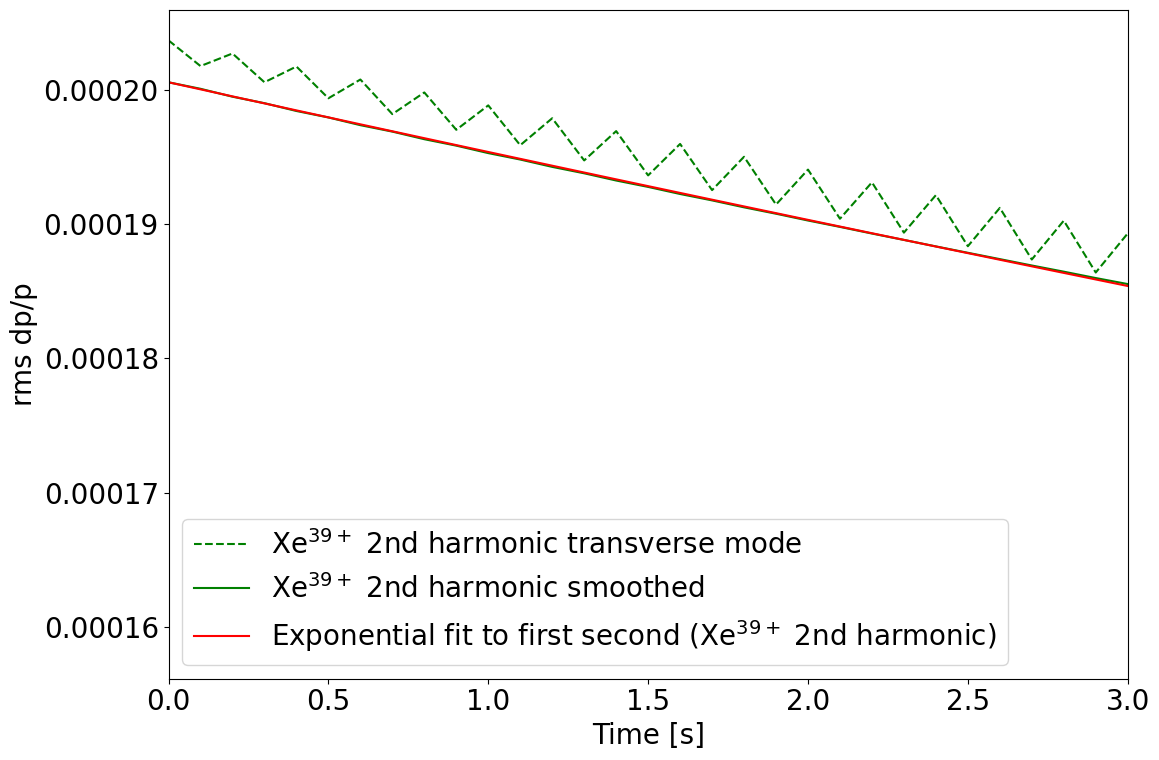

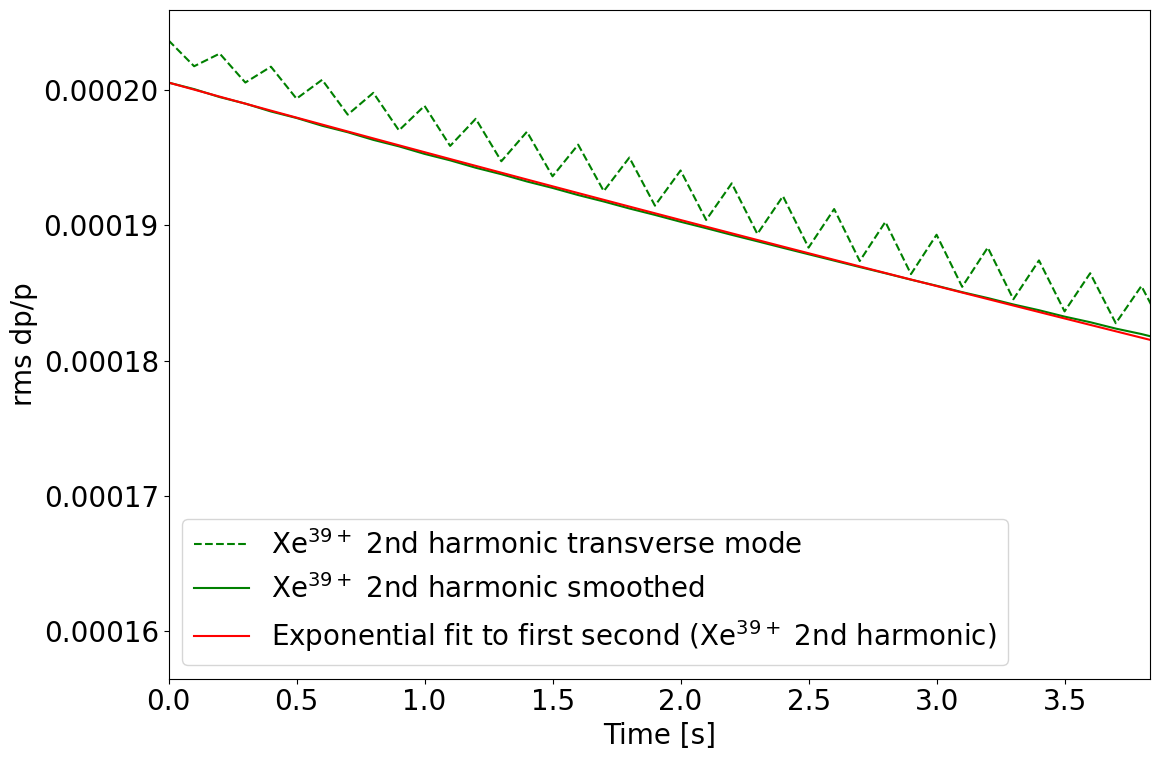

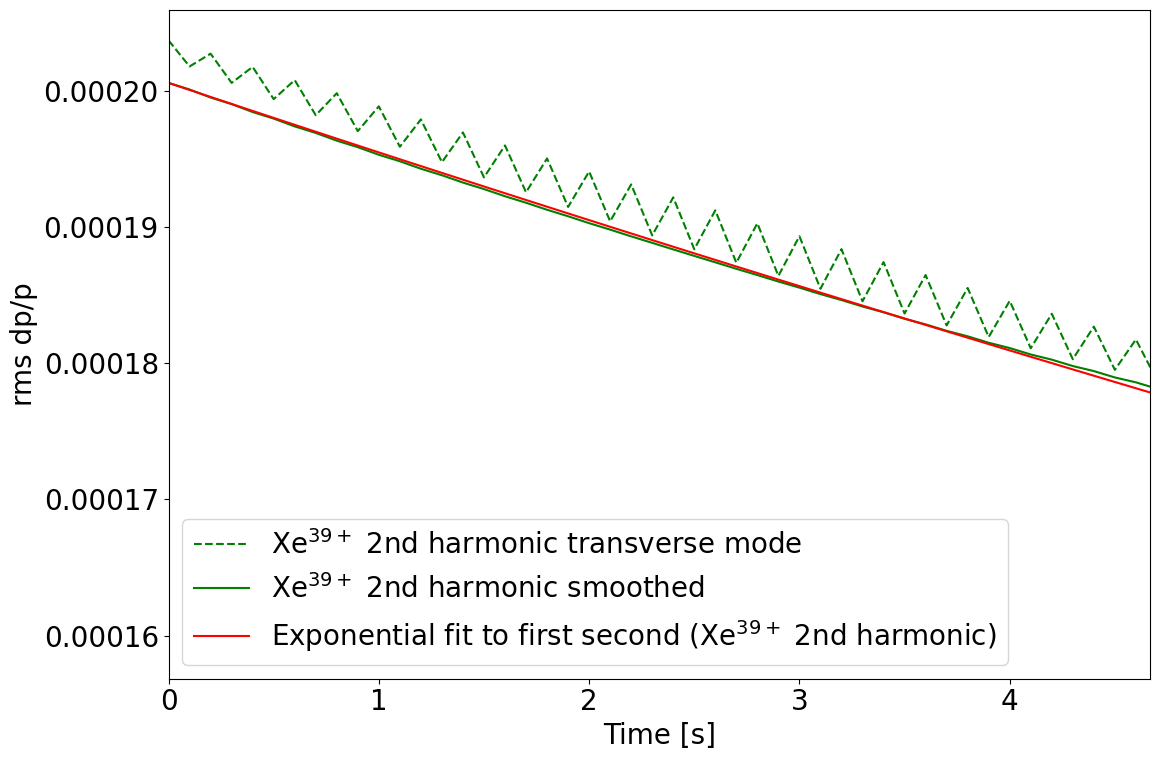

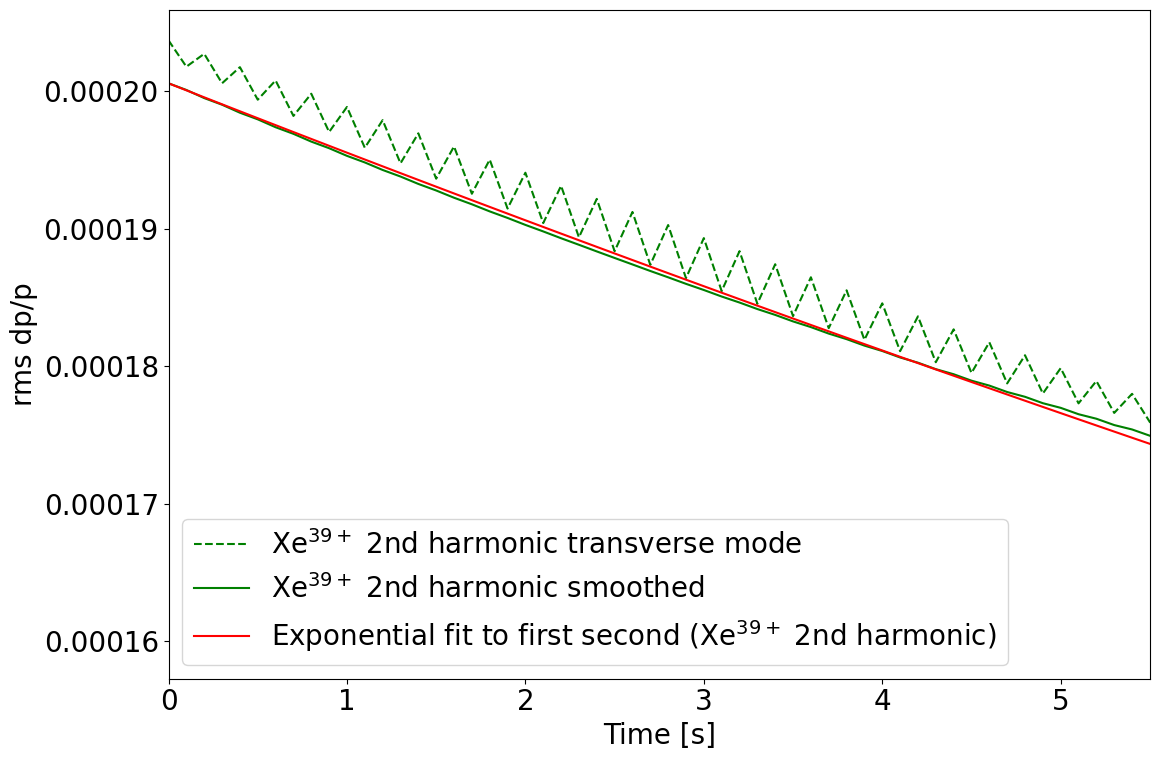

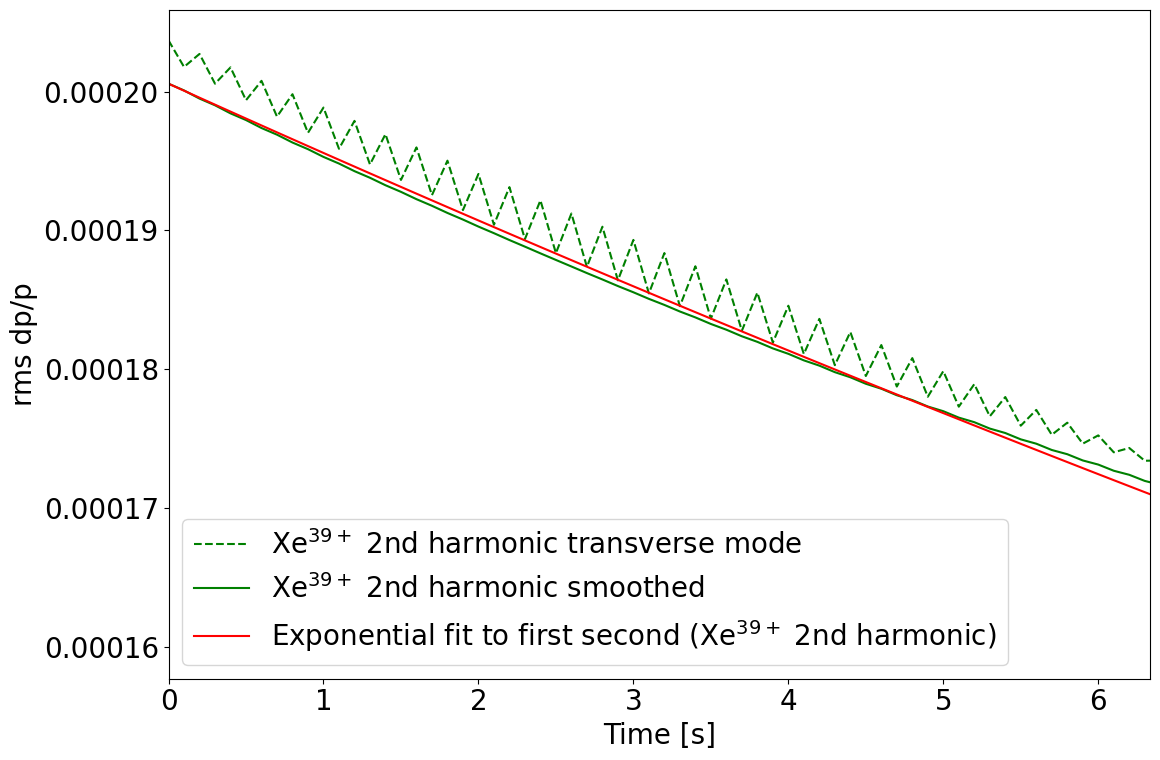

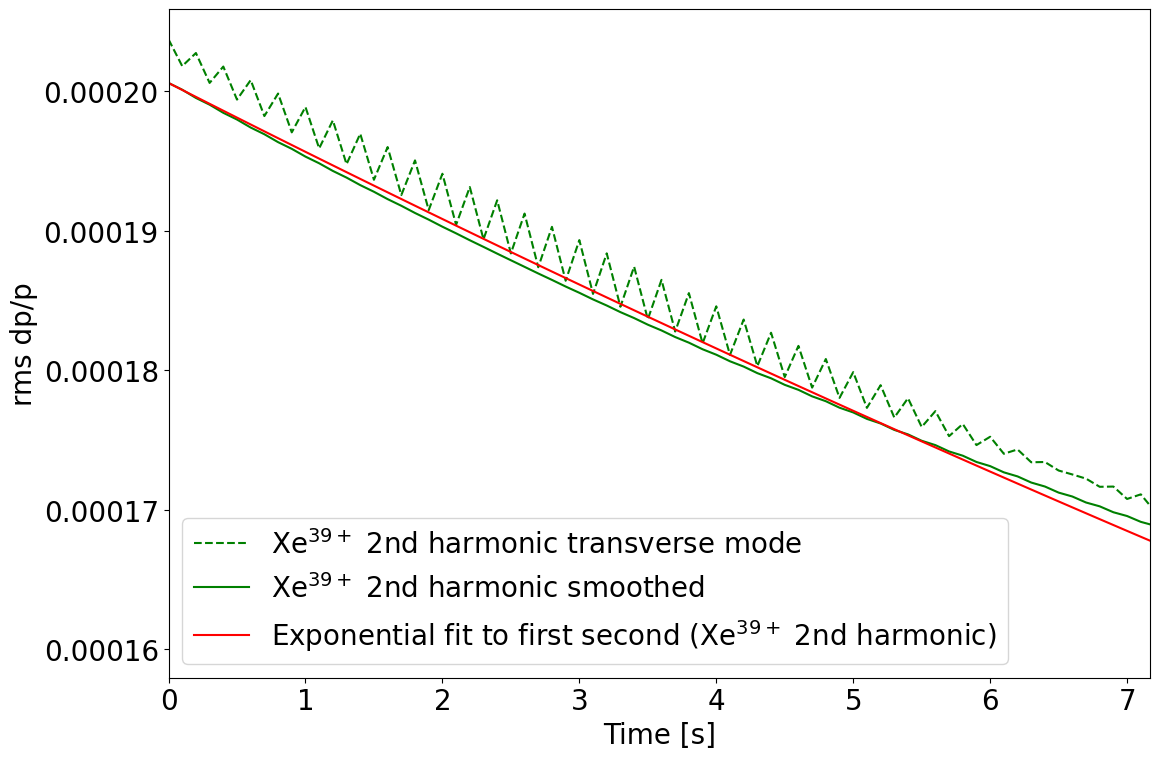

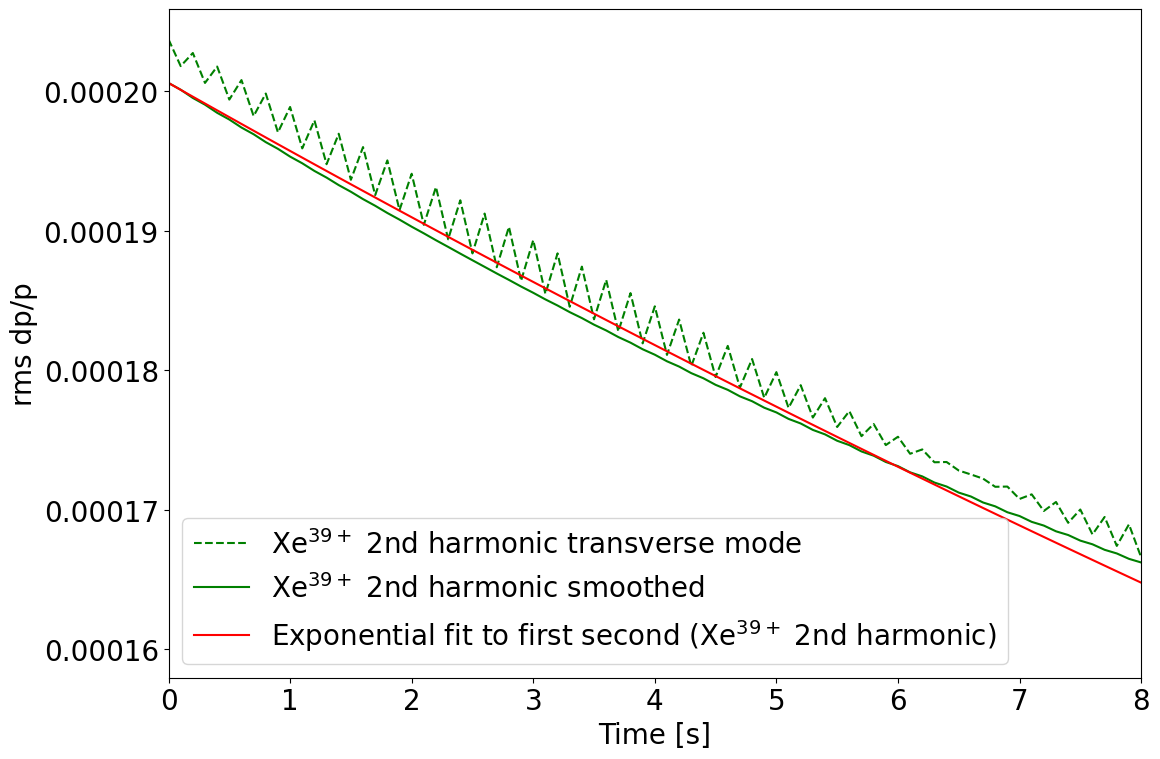

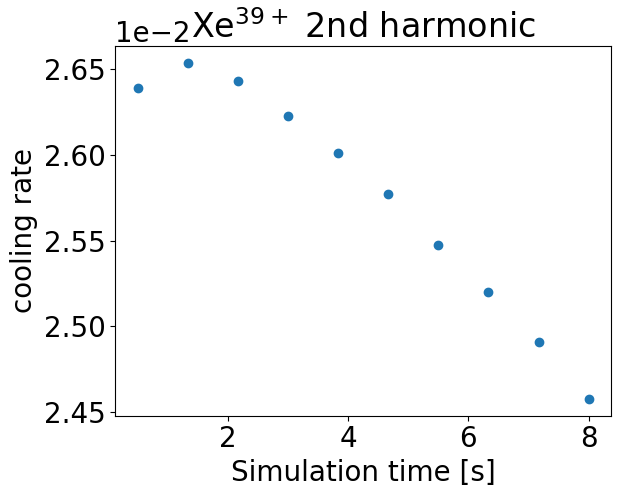

10


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming you have imported necessary data and defined ions and colors



def exponential_func(x, a, b):
    return rms_dp_p_smoothed[0] * np.exp(-b * x)

mask_range = np.linspace(0.5, 8, num=10)  # Adjust the number of masks as needed

for i, ion_loop in enumerate([xenon,xenon2nd]):

    cooler_rate=[]

    loaded_data = np.load(f'results/cooling_rates/transverse/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x']
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']

    excited0 = state[1, :] == 2
    fraction_excitation = sum(excited0) / len(excited0)
    rms_dp_p = np.std(delta, axis=1)

    # Calculate moving average with window size 5
    # Adjust the window size for moving average smoothing
    window_size = 10  # or any other suitable value
    rms_dp_p_smoothed = np.convolve(rms_dp_p, np.ones(window_size)/window_size, mode='valid')

    for mask_value in mask_range:

        window_size = 10  # or any other suitable value
        rms_dp_p_smoothed = np.convolve(rms_dp_p, np.ones(window_size)/window_size, mode='valid')


        # Fit exponential to the first second of data
        mask = time[:len(rms_dp_p_smoothed)] <= mask_value
        fit_params, _ = curve_fit(exponential_func, time[:len(rms_dp_p_smoothed)][mask], rms_dp_p_smoothed[mask])
        cooler_rate.append(fit_params[1])
        #fit_params, _ = curve_fit(exponential_func, time[mask], rms_dp_p_smoothed[mask])

        plt.figure(figsize=(12, 8))
        plt.rcParams.update({'font.size': 20})
        plt.plot(time, rms_dp_p, label=f'{ion_loop.name} transverse mode', ls='--', color=colors[i])
        plt.plot(time[:len(rms_dp_p_smoothed)], rms_dp_p_smoothed, label=f'{ion_loop.name} smoothed', color=colors[i])
        # plt.plot(time[mask], exponential_func(time[mask], *fit_params), color=colors[i],
        #           label=f'Exponential fit to first second ({ion_loop.name})')
        plt.plot(time[:len(rms_dp_p_smoothed)], exponential_func(time[:len(rms_dp_p_smoothed)], *fit_params), color='red',
                label=f'Exponential fit to first second ({ion_loop.name})')
    

        plt.xlabel(r'Time [s]')
        plt.ylabel(r'rms dp/p')
        plt.xlim([0,mask_value])
        plt.legend()
        plt.tight_layout()
        plt.show()



    plt.figure()
    plt.title(f'{ion_loop.name}')
    plt.scatter(mask_range,cooler_rate)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xlabel('Simulation time [s]')
    plt.ylabel('cooling rate')
    plt.show()
    print(len(cooler_rate))